In [225]:
import matplotlib.pyplot as plt

In [226]:
import eurostat
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
import scipy.stats as stats
import statsmodels as sm
import plotly.express as px
from pandas import DataFrame
import plotly.express as px
from tabulate import tabulate
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

# Analysis of unemployment and employment by sex and educational attainment in Bulgaria and the EU.

## 4. Empirical results

### Step one. Loading and tidy
#### In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations:
- loading the databases
- extraction of uniqueness by features and observations
- basic information about the data
- checking and removing punctuation marks
- rename columns

#### Loading the data.
Since the loading of the data as well as the other sub-steps can be automated, a function has been created to set both the code of the data to Eurostat and the name of the database that will be loaded.
Loading unemployment rate and employment rate databases.

In [227]:
def load_and_name_db (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [228]:
load_and_name_db(unemployment_all = "une_educ_q")

,sex,isced11,age,s_adj,unit,geo\time,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
0,F,ED0-2,Y15-74,NSA,PC_ACT,AT,9.4,11.1,10.9,11.3,...,8.6,8.9,7.6,8.4,8.8,8.4,8.9,11.5,9.7,9.3
1,F,ED0-2,Y15-74,NSA,PC_ACT,BE,16.6,12.7,11.1,13.6,...,15.1,15.2,17.6,18.1,16.0,16.3,15.0,15.4,15.7,16.2
2,F,ED0-2,Y15-74,NSA,PC_ACT,BG,16.4,18.4,14.2,14.3,...,31.3,34.6,30.6,24.5,25.6,25.9,21.9,19.3,18.2,20.7
3,F,ED0-2,Y15-74,NSA,PC_ACT,CH,9.1,8.7,8.2,9.4,...,6.9,8.2,7.5,9.4,7.5,8.6,NaN,NaN,7.9,NaN
4,F,ED0-2,Y15-74,NSA,PC_ACT,CY,8.4,9.1,8.5,7.5,...,4.1,6.9,3.5,3.8,5.2,8.0,4.9,4.2,5.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,T,ED5-8,Y20-64,TC,THS_PER,RS,55.0,58.0,64.0,69.0,...,99.0,97.0,93.0,89.0,85.0,82.0,NaN,NaN,NaN,NaN
5828,T,ED5-8,Y20-64,TC,THS_PER,SE,84.0,85.0,88.0,96.0,...,64.0,64.0,66.0,68.0,71.0,72.0,71.0,67.0,62.0,58.0
5829,T,ED5-8,Y20-64,TC,THS_PER,SI,12.0,12.0,13.0,13.0,...,16.0,15.0,14.0,13.0,12.0,12.0,11.0,10.0,9.0,10.0
5830,T,ED5-8,Y20-64,TC,THS_PER,SK,20.0,21.0,21.0,22.0,...,27.0,27.0,26.0,26.0,26.0,23.0,21.0,18.0,15.0,13.0


In [229]:
load_and_name_db(employment_all = "lfsi_educ_q")

,s_adj,isced11,sex,age,unit,geo\time,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
0,NSA,ED0-2,F,Y15-24,PC_EMP,AT,22.4,21.5,23.0,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSA,ED0-2,F,Y15-24,PC_EMP,BE,16.2,17.8,14.2,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSA,ED0-2,F,Y15-24,PC_EMP,BG,NaN,NaN,NaN,15.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSA,ED0-2,F,Y15-24,PC_EMP,CH,30.3,29.9,32.4,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSA,ED0-2,F,Y15-24,PC_EMP,CY,6.0,8.2,9.0,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,TC,ED5-8,T,Y55-64,THS_PER,RO,155.0,153.0,150.0,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,TC,ED5-8,T,Y55-64,THS_PER,RS,122.0,121.0,117.0,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,TC,ED5-8,T,Y55-64,THS_PER,SE,364.0,362.0,362.0,361.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,TC,ED5-8,T,Y55-64,THS_PER,SI,66.0,64.0,62.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Extraction of uniqueness by columns and elements
After loading databases, especially when they are large, it is important to get familiar with features and observations in them. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of meaningful content.

In [230]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not col[0].isdigit():
            print(f"Elements of columns (observations): \"{col}\" са: \n {df[col].unique()}")
        else:
            pass
    print(f"The unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [231]:
uniques(unemployment_all)

Names of columns (features): 
Index(['sex', 'isced11', 'age', 's_adj', 'unit', 'geo\time', '2022Q2',
       '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3',
       '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4',
       '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1',
       '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2',
       '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3',
       '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4',
       '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1',
       '2009Q4', '2009Q3', '2009Q2', '2009Q1'],
      dtype='object')
Elements of columns (observations): "sex" са: 
 ['F' 'M' 'T']
Elements of columns (observations): "isced11" са: 
 ['ED0-2' 'ED3_4' 'ED5-8']
Elements of columns (observations): "age" са: 
 ['Y15-74' 'Y20-64']
Elements of columns (observations): "s_adj" са: 
 ['NSA' 'SA' 'TC']
Elements of co

In [232]:
uniques(employment_all)

Names of columns (features): 
Index(['s_adj', 'isced11', 'sex', 'age', 'unit', 'geo\time', '2022Q2',
       '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3',
       '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4',
       '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1',
       '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2',
       '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3',
       '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4',
       '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1',
       '2009Q4', '2009Q3', '2009Q2', '2009Q1'],
      dtype='object')
Elements of columns (observations): "s_adj" са: 
 ['NSA' 'SA' 'TC']
Elements of columns (observations): "isced11" са: 
 ['ED0-2' 'ED3_4' 'ED5-8']
Elements of columns (observations): "sex" са: 
 ['F' 'M' 'T']
Elements of columns (observations): "age" са: 
 ['Y15-24' 'Y15-29' 'Y15-64' 'Y15-7

#### Basic information about the data
Parallel to the previous step, it is important to output the database parameters such as size, number of cases, data type, etc. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of technical content.

In [233]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("--------")
    print (f"2. Number of cases in the table: {df.size}")
    print("--------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("--------")

    list_objects = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" float64 = {list_float64}")

In [234]:
db_info(unemployment_all)

1. Оbservations and features: 
 5832 Оbservations and 60 features
--------
2. Number of cases in the table: 349920
--------
3. The sum of element types by type is as follows: 
 object      6
float64    54
dtype: int64
--------
4. Group the features by data type:
 object = ['sex', 'isced11', 'age', 's_adj', 'unit', 'geo\\time'] 

 float64 = ['2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1', '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2', '2009Q1']


In [235]:
db_info(employment_all)

1. Оbservations and features: 
 19440 Оbservations and 60 features
--------
2. Number of cases in the table: 1166400
--------
3. The sum of element types by type is as follows: 
 object      6
float64    54
dtype: int64
--------
4. Group the features by data type:
 object = ['s_adj', 'isced11', 'sex', 'age', 'unit', 'geo\\time'] 

 float64 = ['2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1', '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2', '2009Q1']


#### Checking and removing punctuation marks
In order for features names and оbservations to be used it is important to remove any characters that will prevent the code from recognizing them as variables

In [236]:
def punctuation_ckeck (df):
    corect_column_names=[]
    uncorect_column_names=[]
    for col in df.columns:       
        if (col.isalpha()) == True:
            corect_column_names += [col]
        else:
            uncorect_column_names +=[col]
    print(f"Features names without special characters are: \n {corect_column_names}")
    print("--------")
    print(f"Features with the presence of special characters in their names and need to be reviewed for corrections are: \n {uncorect_column_names}")
    print("--------")
    print(f"Correct table by removing the following punctuation marks: '[^\w\s]', ''")

    df.columns = df.columns.str.replace('[^\w\s]', '') 
    return(df)

In [237]:
punctuation_ckeck(unemployment_all)

Features names without special characters are: 
 ['sex', 'age', 'unit']
--------
Features with the presence of special characters in their names and need to be reviewed for corrections are: 
 ['isced11', 's_adj', 'geo\\time', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1', '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2', '2009Q1']
--------
Correct table by removing the following punctuation marks: '[^\w\s]', ''


,sex,isced11,age,s_adj,unit,geotime,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
0,F,ED0-2,Y15-74,NSA,PC_ACT,AT,9.4,11.1,10.9,11.3,...,8.6,8.9,7.6,8.4,8.8,8.4,8.9,11.5,9.7,9.3
1,F,ED0-2,Y15-74,NSA,PC_ACT,BE,16.6,12.7,11.1,13.6,...,15.1,15.2,17.6,18.1,16.0,16.3,15.0,15.4,15.7,16.2
2,F,ED0-2,Y15-74,NSA,PC_ACT,BG,16.4,18.4,14.2,14.3,...,31.3,34.6,30.6,24.5,25.6,25.9,21.9,19.3,18.2,20.7
3,F,ED0-2,Y15-74,NSA,PC_ACT,CH,9.1,8.7,8.2,9.4,...,6.9,8.2,7.5,9.4,7.5,8.6,NaN,NaN,7.9,NaN
4,F,ED0-2,Y15-74,NSA,PC_ACT,CY,8.4,9.1,8.5,7.5,...,4.1,6.9,3.5,3.8,5.2,8.0,4.9,4.2,5.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,T,ED5-8,Y20-64,TC,THS_PER,RS,55.0,58.0,64.0,69.0,...,99.0,97.0,93.0,89.0,85.0,82.0,NaN,NaN,NaN,NaN
5828,T,ED5-8,Y20-64,TC,THS_PER,SE,84.0,85.0,88.0,96.0,...,64.0,64.0,66.0,68.0,71.0,72.0,71.0,67.0,62.0,58.0
5829,T,ED5-8,Y20-64,TC,THS_PER,SI,12.0,12.0,13.0,13.0,...,16.0,15.0,14.0,13.0,12.0,12.0,11.0,10.0,9.0,10.0
5830,T,ED5-8,Y20-64,TC,THS_PER,SK,20.0,21.0,21.0,22.0,...,27.0,27.0,26.0,26.0,26.0,23.0,21.0,18.0,15.0,13.0


In [238]:
punctuation_ckeck(employment_all)

Features names without special characters are: 
 ['sex', 'age', 'unit']
--------
Features with the presence of special characters in their names and need to be reviewed for corrections are: 
 ['s_adj', 'isced11', 'geo\\time', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1', '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2', '2009Q1']
--------
Correct table by removing the following punctuation marks: '[^\w\s]', ''


,s_adj,isced11,sex,age,unit,geotime,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
0,NSA,ED0-2,F,Y15-24,PC_EMP,AT,22.4,21.5,23.0,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSA,ED0-2,F,Y15-24,PC_EMP,BE,16.2,17.8,14.2,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSA,ED0-2,F,Y15-24,PC_EMP,BG,NaN,NaN,NaN,15.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSA,ED0-2,F,Y15-24,PC_EMP,CH,30.3,29.9,32.4,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSA,ED0-2,F,Y15-24,PC_EMP,CY,6.0,8.2,9.0,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,TC,ED5-8,T,Y55-64,THS_PER,RO,155.0,153.0,150.0,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,TC,ED5-8,T,Y55-64,THS_PER,RS,122.0,121.0,117.0,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,TC,ED5-8,T,Y55-64,THS_PER,SE,364.0,362.0,362.0,361.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,TC,ED5-8,T,Y55-64,THS_PER,SI,66.0,64.0,62.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Rename columns
Creation of a function that allows renaming columns with new names for greater convenience in analysis.

In [239]:
def rename_features (df, **kwargs):
    for col in df.columns:
        for key, value in kwargs.items():
            if key == col:
                df.rename({col:value}, axis=1, inplace=True)

In [240]:
rename_features(unemployment_all, isced11="education", geotime="geo")
unemployment_all

,sex,education,age,s_adj,unit,geo,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
0,F,ED0-2,Y15-74,NSA,PC_ACT,AT,9.4,11.1,10.9,11.3,...,8.6,8.9,7.6,8.4,8.8,8.4,8.9,11.5,9.7,9.3
1,F,ED0-2,Y15-74,NSA,PC_ACT,BE,16.6,12.7,11.1,13.6,...,15.1,15.2,17.6,18.1,16.0,16.3,15.0,15.4,15.7,16.2
2,F,ED0-2,Y15-74,NSA,PC_ACT,BG,16.4,18.4,14.2,14.3,...,31.3,34.6,30.6,24.5,25.6,25.9,21.9,19.3,18.2,20.7
3,F,ED0-2,Y15-74,NSA,PC_ACT,CH,9.1,8.7,8.2,9.4,...,6.9,8.2,7.5,9.4,7.5,8.6,NaN,NaN,7.9,NaN
4,F,ED0-2,Y15-74,NSA,PC_ACT,CY,8.4,9.1,8.5,7.5,...,4.1,6.9,3.5,3.8,5.2,8.0,4.9,4.2,5.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,T,ED5-8,Y20-64,TC,THS_PER,RS,55.0,58.0,64.0,69.0,...,99.0,97.0,93.0,89.0,85.0,82.0,NaN,NaN,NaN,NaN
5828,T,ED5-8,Y20-64,TC,THS_PER,SE,84.0,85.0,88.0,96.0,...,64.0,64.0,66.0,68.0,71.0,72.0,71.0,67.0,62.0,58.0
5829,T,ED5-8,Y20-64,TC,THS_PER,SI,12.0,12.0,13.0,13.0,...,16.0,15.0,14.0,13.0,12.0,12.0,11.0,10.0,9.0,10.0
5830,T,ED5-8,Y20-64,TC,THS_PER,SK,20.0,21.0,21.0,22.0,...,27.0,27.0,26.0,26.0,26.0,23.0,21.0,18.0,15.0,13.0


In [241]:
rename_features(employment_all, isced11="education", geotime="geo")
employment_all

,s_adj,education,sex,age,unit,geo,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
0,NSA,ED0-2,F,Y15-24,PC_EMP,AT,22.4,21.5,23.0,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSA,ED0-2,F,Y15-24,PC_EMP,BE,16.2,17.8,14.2,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSA,ED0-2,F,Y15-24,PC_EMP,BG,NaN,NaN,NaN,15.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSA,ED0-2,F,Y15-24,PC_EMP,CH,30.3,29.9,32.4,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSA,ED0-2,F,Y15-24,PC_EMP,CY,6.0,8.2,9.0,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,TC,ED5-8,T,Y55-64,THS_PER,RO,155.0,153.0,150.0,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,TC,ED5-8,T,Y55-64,THS_PER,RS,122.0,121.0,117.0,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,TC,ED5-8,T,Y55-64,THS_PER,SE,364.0,362.0,362.0,361.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,TC,ED5-8,T,Y55-64,THS_PER,SI,66.0,64.0,62.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step two. Missing values
#### In this step, missing values analysis is done. The goal is to examine their proportions, check for a pattern, and remove them where appropriate:
- general check for missing data
- searching for a pattern in the missing data
- check for Outliers in missing data
- targeted removal of missing data

#### General check for missing data
In this substep, a function is created to provide information about missing data by features. This information is both in tabular form (absolute and relative values) and in graphic form for better visualization. The relative value shows the percentage of missing data relative to all data in the corresponding feature.

In [242]:
def missing_check(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    g = b.map(lambda n: '{:,.2%}'.format(n))
    b1 = df_missing / len(df)
    g1 = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    f9 = pd.concat([df_missing, g], axis=1, keys=('Absolute number','Relative number'))
    plt.figure(figsize=(10,15))
    print(f9)
    plt.barh(df_missing.to_frame(name=None).index, df_missing.to_frame(name=None)[0])

Missing values
           Absolute number Relative number
sex                      0           0.00%
education                0           0.00%
age                      0           0.00%
s_adj                    0           0.00%
unit                     0           0.00%
geo                      0           0.00%
2022Q2                 726          12.45%
2022Q1                 708          12.14%
2021Q4                 717          12.29%
2021Q3                 687          11.78%
2021Q2                 654          11.21%
2021Q1                 630          10.80%
2020Q4                 141           2.42%
2020Q3                 108           1.85%
2020Q2                 153           2.62%
2020Q1                 228           3.91%
2019Q4                 267           4.58%
2019Q3                 189           3.24%
2019Q2                 207           3.55%
2019Q1                 210           3.60%
2018Q4                 243           4.17%
2018Q3                 222           3.

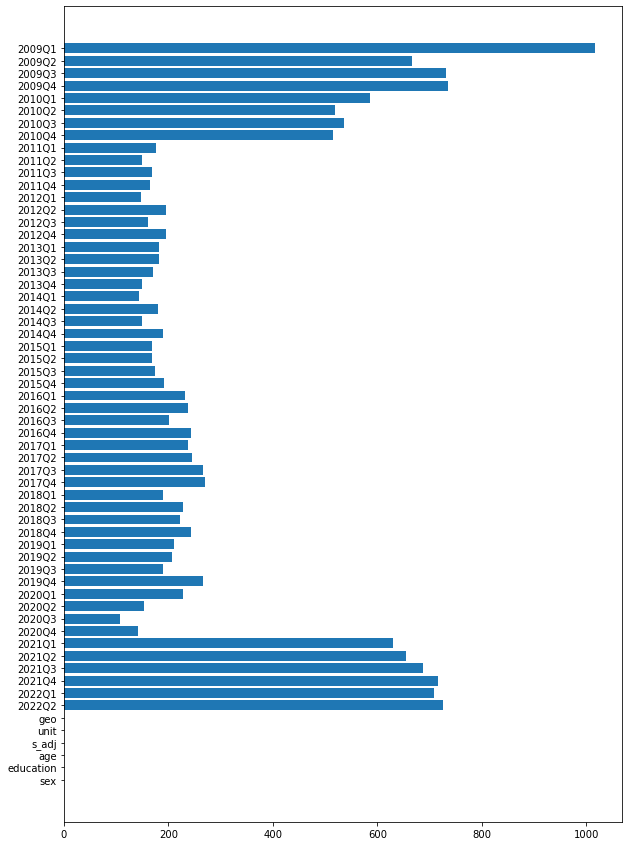

In [243]:
missing_check(unemployment_all)

Missing values
           Absolute number Relative number
s_adj                    0           0.00%
education                0           0.00%
sex                      0           0.00%
age                      0           0.00%
unit                     0           0.00%
geo                      0           0.00%
2022Q2                 999           5.14%
2022Q1                1005           5.17%
2021Q4                1032           5.31%
2021Q3                1011           5.20%
2021Q2                1047           5.39%
2021Q1                1104           5.68%
2020Q4               10935          56.25%
2020Q3               10935          56.25%
2020Q2               10935          56.25%
2020Q1               10935          56.25%
2019Q4               10692          55.00%
2019Q3               10692          55.00%
2019Q2               10692          55.00%
2019Q1               10692          55.00%
2018Q4               10692          55.00%
2018Q3               10692          55.

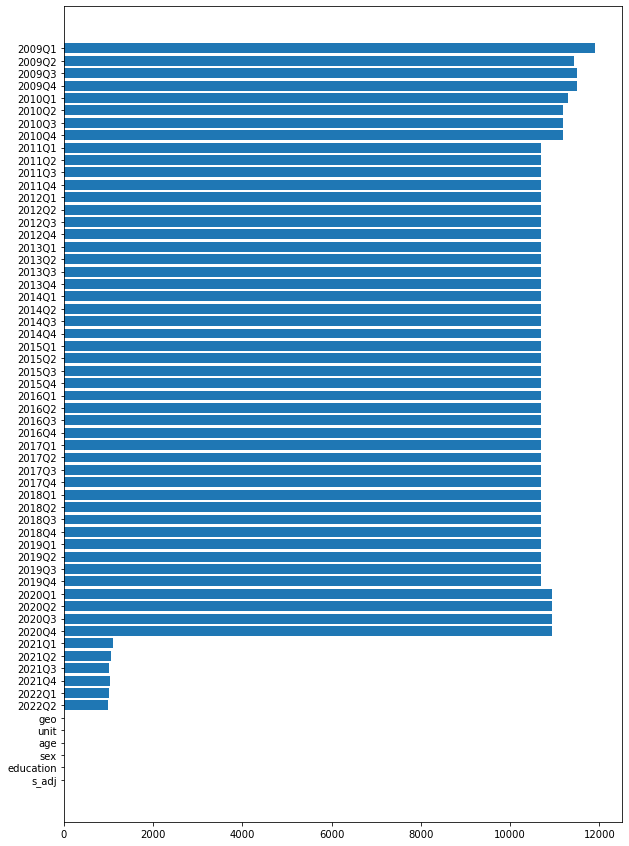

In [244]:
missing_check(employment_all)

#### Searching for a pattern in the missing data
In this substep, a function is made to display the missing values by elements of the corresponding columns, features in order to find a pattern.

In [245]:
def missing_model_check (df):
     for col in df.columns:
        if not col[0].isdigit():
            missing_model = df.groupby(col).apply(lambda x: x.isna().sum().sum()).to_frame(name=None).reset_index()
            missing_model.rename({0:"missing"}, inplace=True, axis=1)
            print(tabulate(missing_model, headers = 'keys', tablefmt = 'psql'))
            fig = px.bar(missing_model, x=missing_model[missing_model.columns[0]], y = missing_model["missing"], 
                    labels={"missing": "Липсващи стойности"},width=700, height=400)
            fig.show()
        else:
            pass

+----+-------+-----------+
|    | sex   |   missing |
|----+-------+-----------|
|  0 | F     |      7902 |
|  1 | M     |      6273 |
|  2 | T     |      2982 |
+----+-------+-----------+


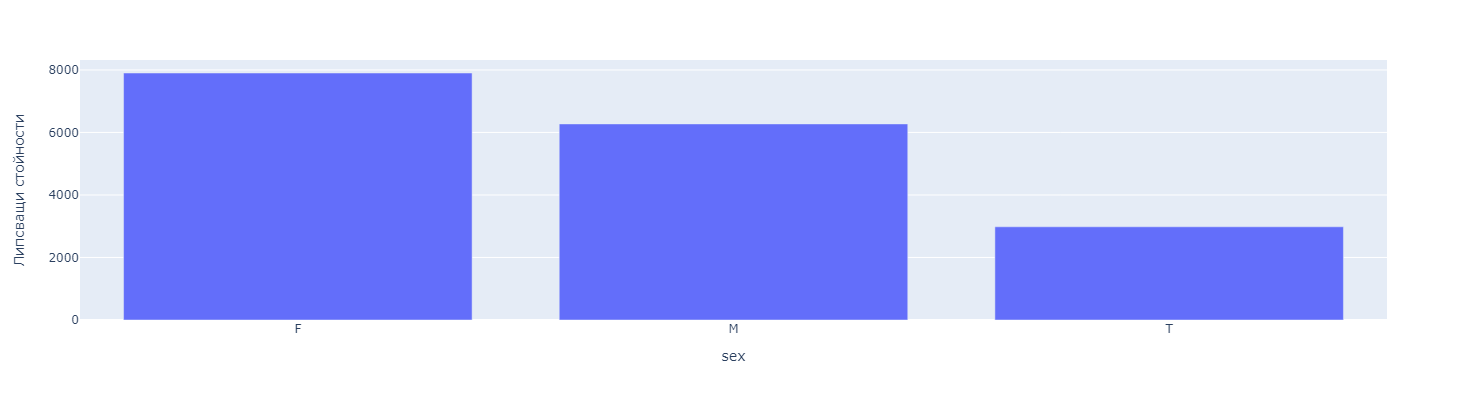

+----+-------------+-----------+
|    | education   |   missing |
|----+-------------+-----------|
|  0 | ED0-2       |      5559 |
|  1 | ED3_4       |      4506 |
|  2 | ED5-8       |      7092 |
+----+-------------+-----------+


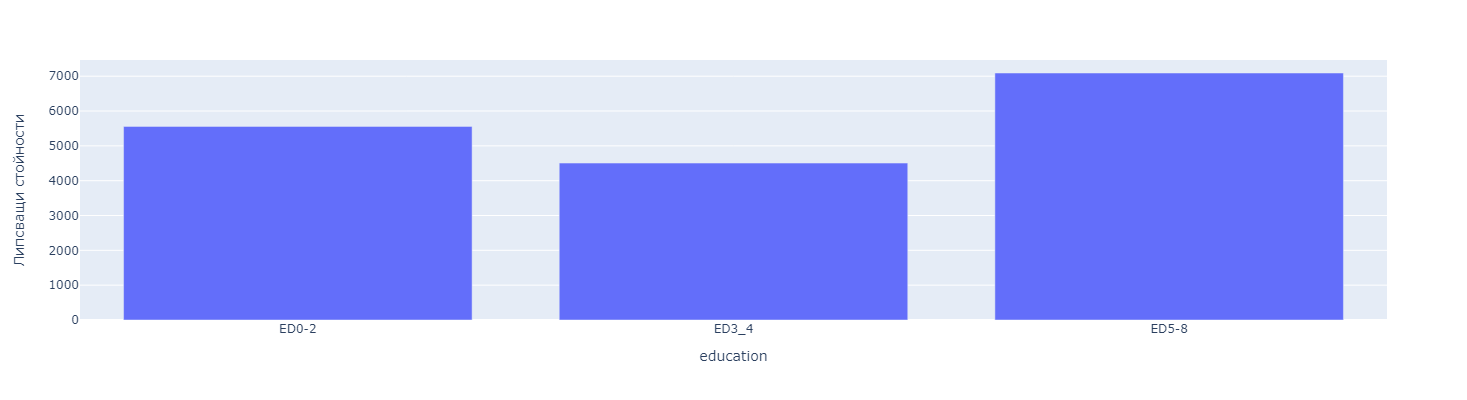

+----+--------+-----------+
|    | age    |   missing |
|----+--------+-----------|
|  0 | Y15-74 |      7893 |
|  1 | Y20-64 |      9264 |
+----+--------+-----------+


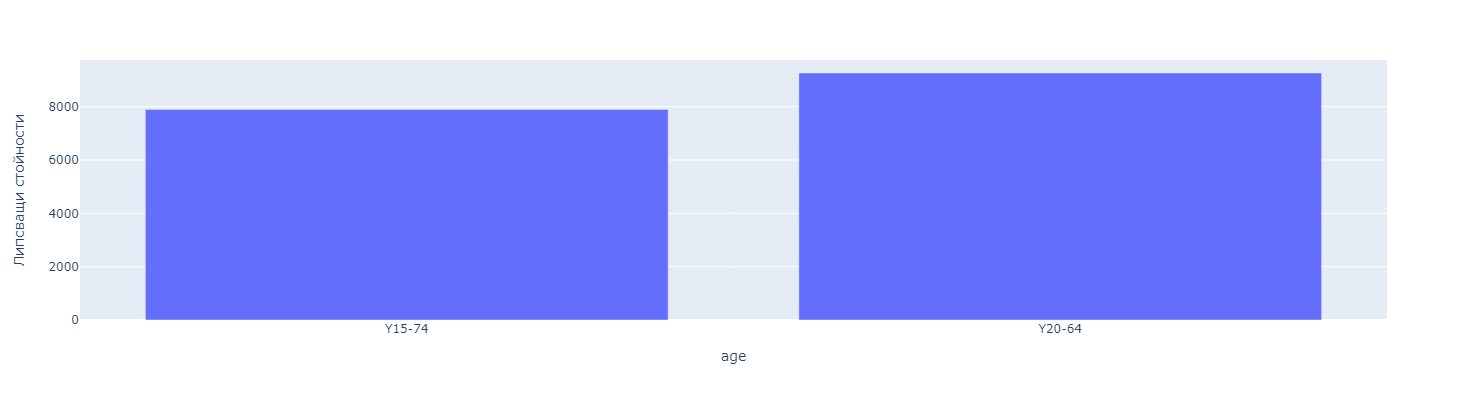

+----+---------+-----------+
|    | s_adj   |   missing |
|----+---------+-----------|
|  0 | NSA     |      5934 |
|  1 | SA      |      5787 |
|  2 | TC      |      5436 |
+----+---------+-----------+


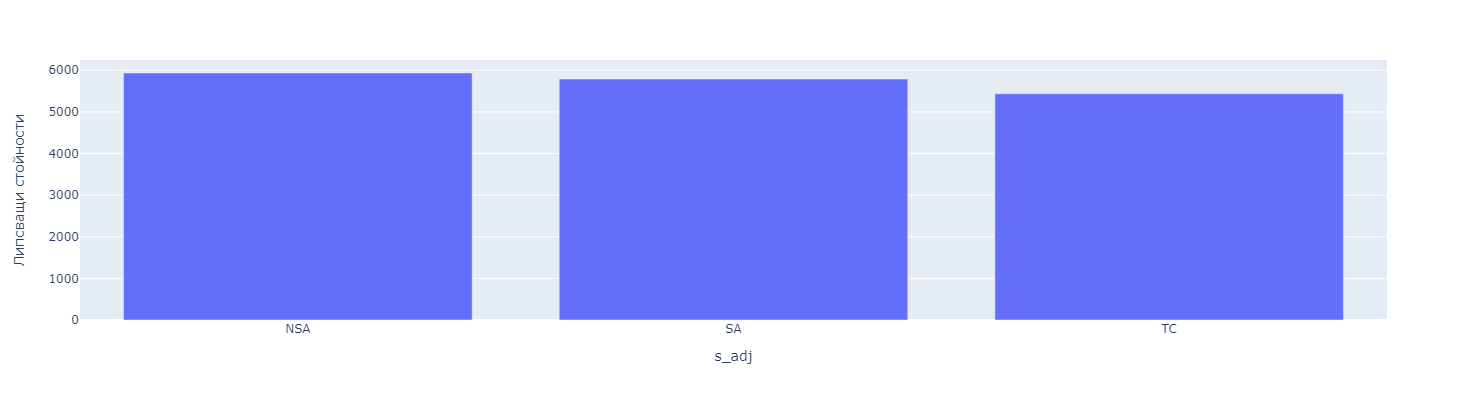

+----+---------+-----------+
|    | unit    |   missing |
|----+---------+-----------|
|  0 | PC_ACT  |      5719 |
|  1 | PC_UNE  |      5719 |
|  2 | THS_PER |      5719 |
+----+---------+-----------+


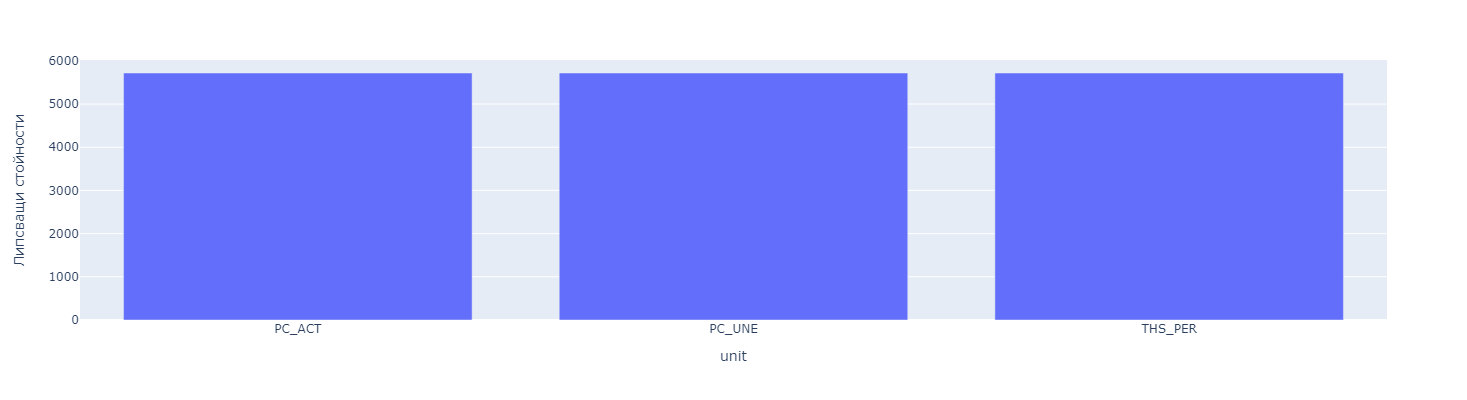

+----+-----------+-----------+
|    | geo       |   missing |
|----+-----------+-----------|
|  0 | AT        |         0 |
|  1 | BE        |         0 |
|  2 | BG        |        24 |
|  3 | CH        |       270 |
|  4 | CY        |         0 |
|  5 | CZ        |         0 |
|  6 | DE        |         0 |
|  7 | DK        |         0 |
|  8 | EA19      |         0 |
|  9 | EE        |      1371 |
| 10 | EL        |         0 |
| 11 | ES        |         0 |
| 12 | EU27_2020 |         0 |
| 13 | FI        |         0 |
| 14 | FR        |         0 |
| 15 | HR        |        33 |
| 16 | HU        |         0 |
| 17 | IE        |       219 |
| 18 | IS        |      1974 |
| 19 | IT        |         0 |
| 20 | LT        |       396 |
| 21 | LU        |      2049 |
| 22 | LV        |       270 |
| 23 | ME        |      2268 |
| 24 | MK        |       972 |
| 25 | MT        |      4239 |
| 26 | NL        |         0 |
| 27 | NO        |         0 |
| 28 | PL        |         0 |
| 29 | P

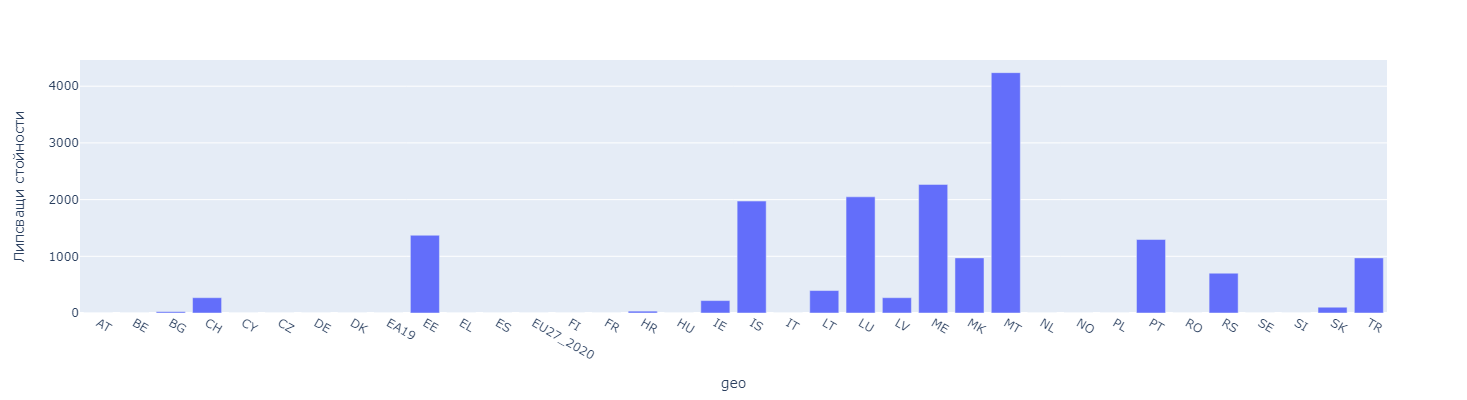

In [246]:
missing_model_check(unemployment_all)

According to the data on the unemployment rate from the tables and graphs, we see that the missing values are evenly distributed among all observations of all features with the exception of the "geo" feature. In it, certain countries have a large number of missing values compared to the others, which indicates the presence of a pattern.

+----+---------+-----------+
|    | s_adj   |   missing |
|----+---------+-----------|
|  0 | NSA     |    175428 |
|  1 | SA      |    175320 |
|  2 | TC      |    175254 |
+----+---------+-----------+


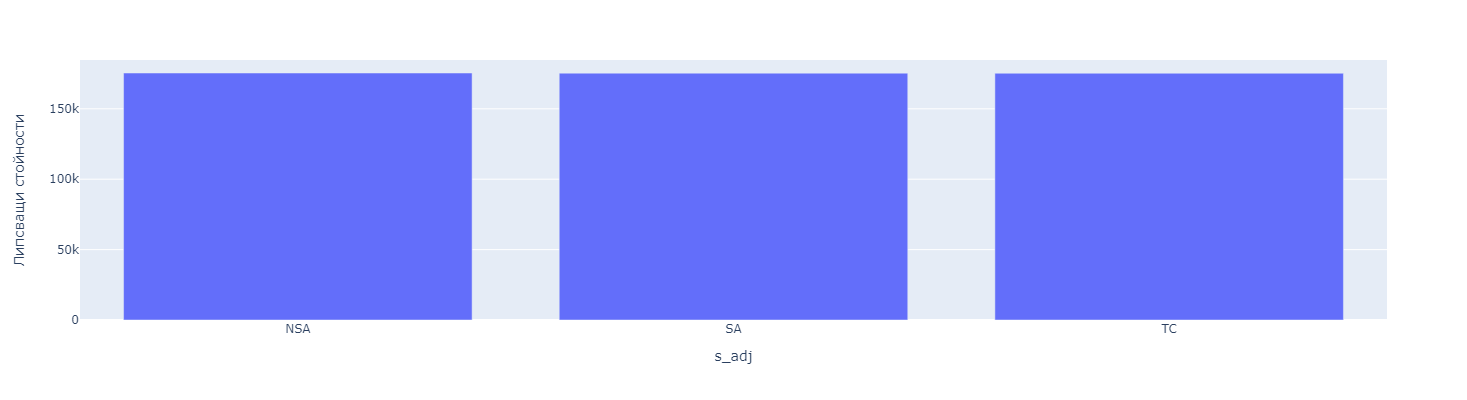

+----+-------------+-----------+
|    | education   |   missing |
|----+-------------+-----------|
|  0 | ED0-2       |    176046 |
|  1 | ED3_4       |    174726 |
|  2 | ED5-8       |    175230 |
+----+-------------+-----------+


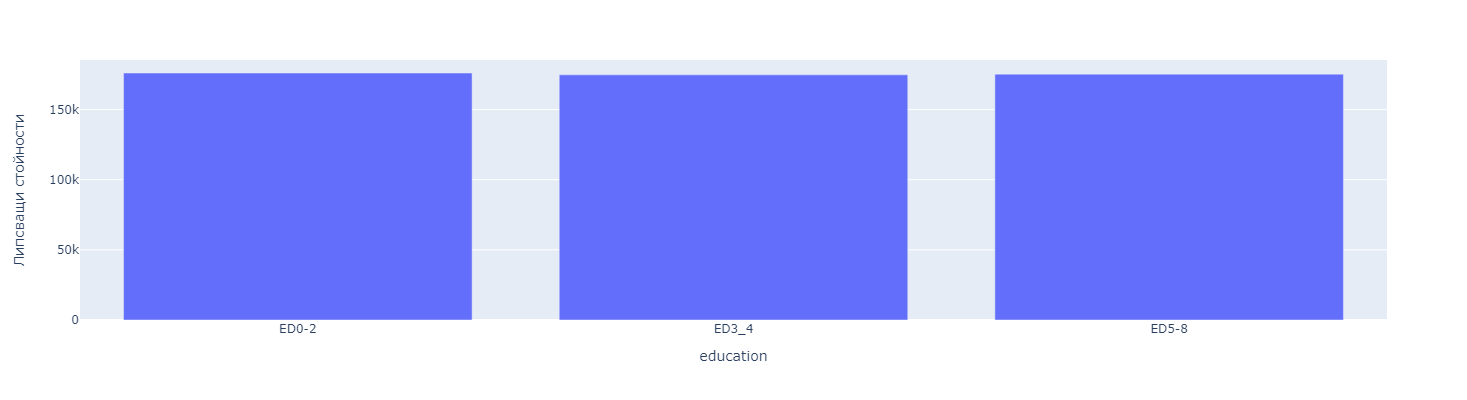

+----+-------+-----------+
|    | sex   |   missing |
|----+-------+-----------|
|  0 | F     |    175668 |
|  1 | M     |    175425 |
|  2 | T     |    174909 |
+----+-------+-----------+


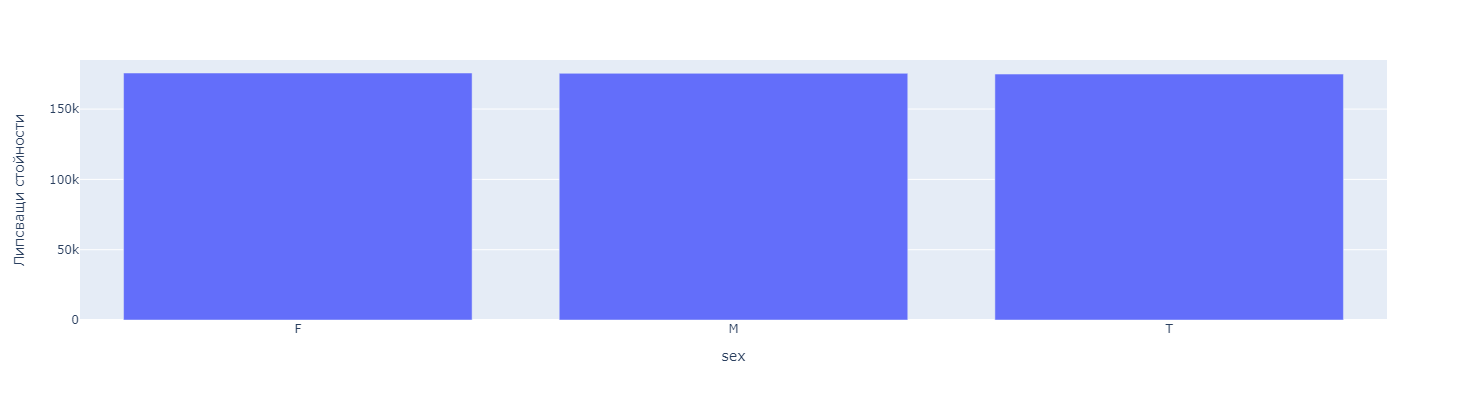

+----+--------+-----------+
|    | age    |   missing |
|----+--------+-----------|
|  0 | Y15-24 |    129444 |
|  1 | Y15-29 |    128604 |
|  2 | Y15-64 |      3672 |
|  3 | Y15-74 |      3672 |
|  4 | Y20-64 |      3618 |
|  5 | Y25-54 |    128304 |
|  6 | Y55-64 |    128688 |
+----+--------+-----------+


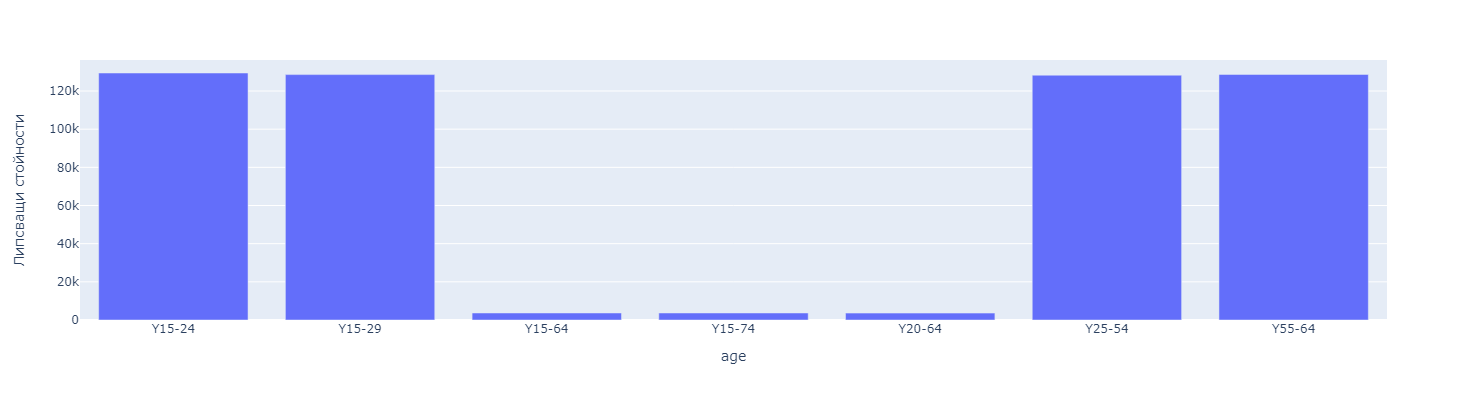

+----+---------+-----------+
|    | unit    |   missing |
|----+---------+-----------|
|  0 | PC_EMP  |    175334 |
|  1 | PC_POP  |    175334 |
|  2 | THS_PER |    175334 |
+----+---------+-----------+


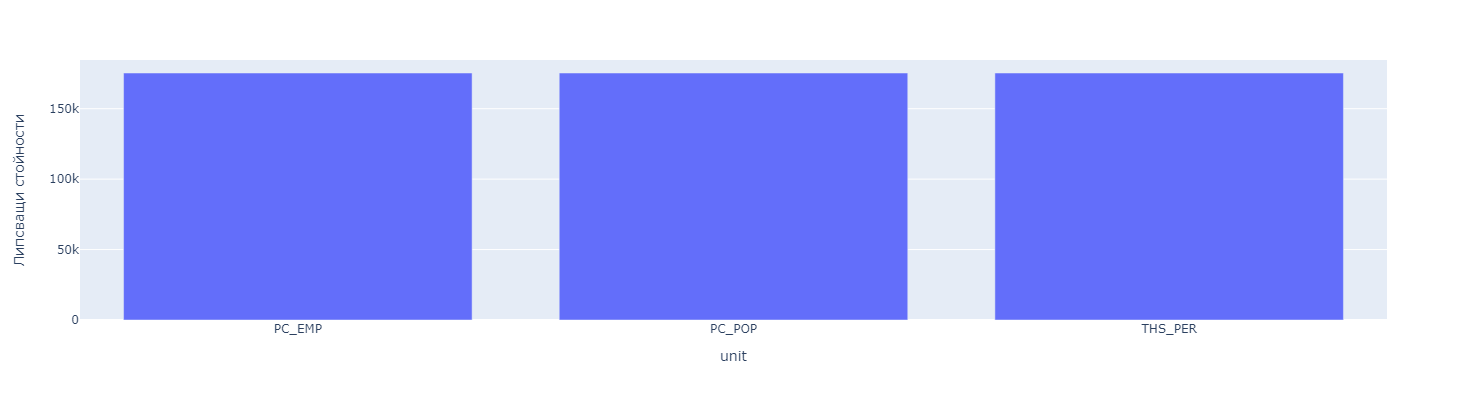

+----+-----------+-----------+
|    | geo       |   missing |
|----+-----------+-----------|
|  0 | AT        |     15552 |
|  1 | BE        |     15552 |
|  2 | BG        |     15624 |
|  3 | CH        |     15957 |
|  4 | CY        |     15552 |
|  5 | CZ        |     15552 |
|  6 | DE        |     16524 |
|  7 | DK        |     15552 |
|  8 | EA19      |     15552 |
|  9 | EE        |     15771 |
| 10 | EL        |     15588 |
| 11 | ES        |     15552 |
| 12 | EU27_2020 |     15552 |
| 13 | FI        |     15570 |
| 14 | FR        |     15552 |
| 15 | HR        |     15798 |
| 16 | HU        |     15552 |
| 17 | IE        |     15795 |
| 18 | IS        |     15666 |
| 19 | IT        |     15552 |
| 20 | LT        |     15816 |
| 21 | LU        |     15606 |
| 22 | LV        |     15753 |
| 23 | ME        |      3402 |
| 24 | MK        |      1458 |
| 25 | MT        |     15624 |
| 26 | NL        |     15552 |
| 27 | NO        |     15552 |
| 28 | PL        |     15552 |
| 29 | P

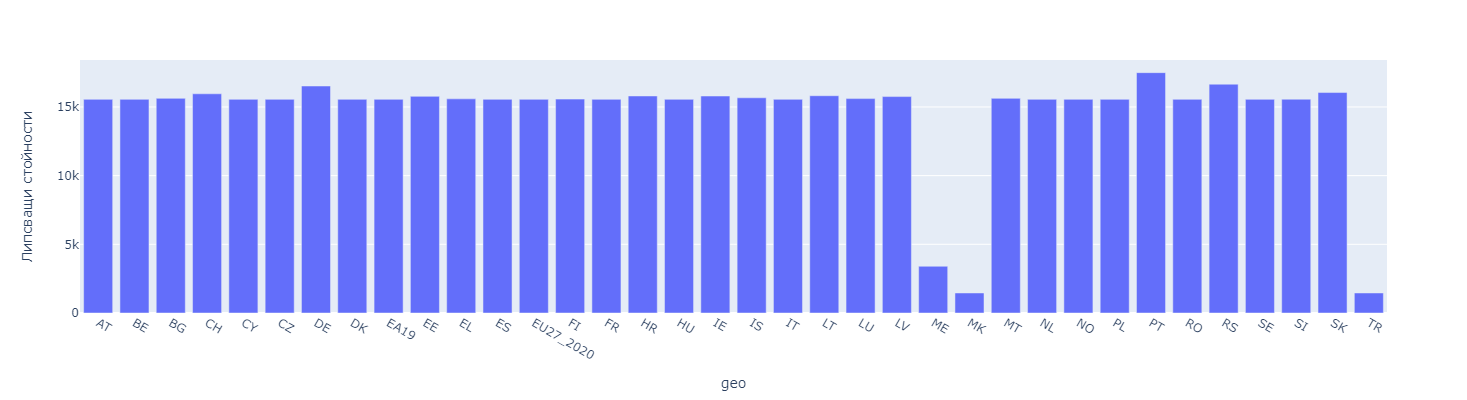

In [247]:
missing_model_check(employment_all)

According to the data on the employment rate from the tables and graphs, we see that the missing values are evenly distributed among all observations of all features with the exception of the "age" feature. In it, certain age groups have a huge number of missing values compared to the others, which indicates the presence of a pattern.

#### Check for Outliers in missing data
In this and the next substep, an author's approach to data exploration is introduced. To supplement the analysis with a study for the presence of outliers in the missing data. In this way, it is possible to support conclusions about the presence of a pattern in the missing data. A function has been created to detect them by feature, and it is also possible to name the result as an independent data set.

In [248]:
def find_outliers_IQR(df, df_name):
    df88 = df.select_dtypes(include='object')
    for col in df88.columns:
        df88 = df.groupby(col).apply(lambda x: x.isna().sum().sum()).to_frame()
        q1=df88.quantile(0.25)
        q3=df88.quantile(0.75)
        IQR=q3-q1
        outliers = df88[((df88<(q1-1.5*IQR)) | (df88>(q3+1.5*IQR)))]

    globals()[df_name] = outliers.dropna()
        
    if outliers.empty:
        pass
    else:
        print (tabulate(globals()[df_name], tablefmt = 'psql'))
        fig = px.box(df88, y=df88[0],width=700, height=400)
        fig.show()
        print("number of outliers: "+ str(len([df_name])))
        print("max outlier value: "+ str(outliers.max()))
        print("min outlier value: "+ str(outliers.min()))

+----+------+
| EE | 1371 |
| IS | 1974 |
| LU | 2049 |
| ME | 2268 |
| MT | 4239 |
| PT | 1296 |
+----+------+


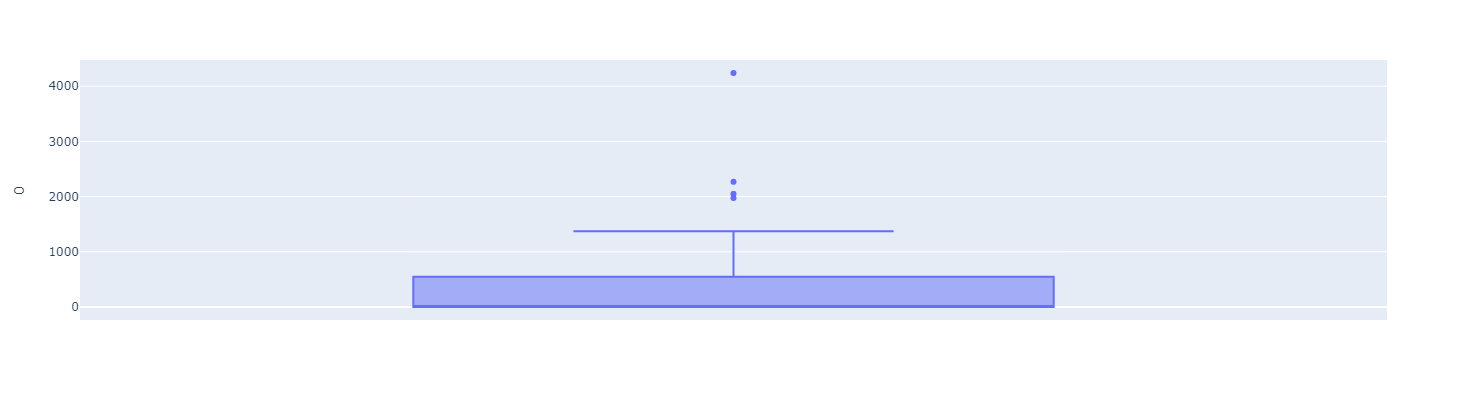

number of outliers: 1
max outlier value: 0    4239.0
dtype: float64
min outlier value: 0    1296.0
dtype: float64


In [249]:
find_outliers_IQR(unemployment_all, "df_un_otliers")

+----+-------+
| DE | 16524 |
| ME |  3402 |
| MK |  1458 |
| PT | 17496 |
| RS | 16656 |
| TR |  1458 |
+----+-------+


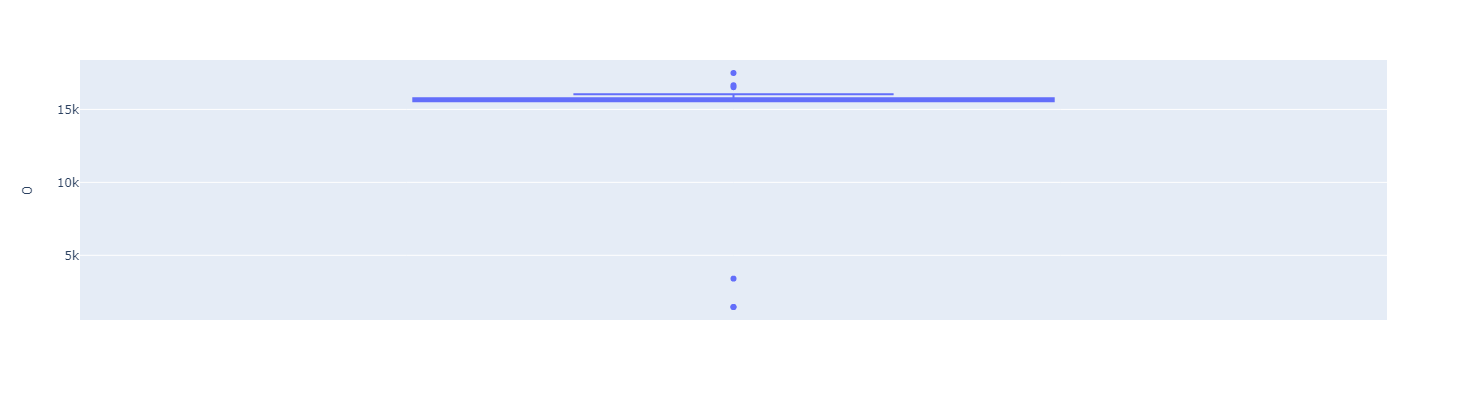

number of outliers: 1
max outlier value: 0    17496.0
dtype: float64
min outlier value: 0    1458.0
dtype: float64


In [250]:
find_outliers_IQR(employment_all, "df_em_otliers")

The data shows that in both databases there are outliers in the "geo" column. This, on the one hand, supports the conclusion about the model of the data appearing in the unemployment rate in this particular column. On the other hand, it fails to detect disparities in the "age" column of the employment rate.

#### Targeted removal of missing data
In this substep, we create a function to remove outliers for missing values and compare the result with the original database tabularly and graphically. And of course naming the result.

In [251]:
def drop_missing_outliers (df, outliers, name):
    values = outliers.index
    globals()[name] = df.copy()
    for col in globals()[name]:
        globals()[name] =  globals()[name][globals()[name][col].isin(values) == False]      
    df_concat = pd.concat([df.isna().sum(),  globals()[name].isna().sum()], axis=1, keys=('Original','Corrected'))
    df_concat["Percentage reduction"] = (((df_concat['Original']-df_concat['Corrected'])/df_concat['Original']).apply('{:.0%}'.format))
    df_concat["Percentage reduction"].replace({"nan%": "not applicable"}, inplace=True)
    print(df_concat)
    plt.figure(figsize=(10,15))
    barh1 = plt.barh(df.isna().sum().to_frame(name=None).index, df.isna().sum().to_frame(name=None)[0])
    barh2 = plt.barh(globals()[name].isna().sum().to_frame(name=None).index, globals()[name].isna().sum().to_frame(name=None)[0])
    plt.legend((barh1, barh2),("Original", "Corrected") )

           Original  Corrected Percentage reduction
sex               0          0       not applicable
education         0          0       not applicable
age               0          0       not applicable
s_adj             0          0       not applicable
unit              0          0       not applicable
geo               0          0       not applicable
2022Q2          726        375                  48%
2022Q1          708        366                  48%
2021Q4          717        384                  46%
2021Q3          687        402                  41%
2021Q2          654        381                  42%
2021Q1          630        360                  43%
2020Q4          141         45                  68%
2020Q3          108         27                  75%
2020Q2          153         48                  69%
2020Q1          228         57                  75%
2019Q4          267         51                  81%
2019Q3          189         36                  81%
2019Q2      

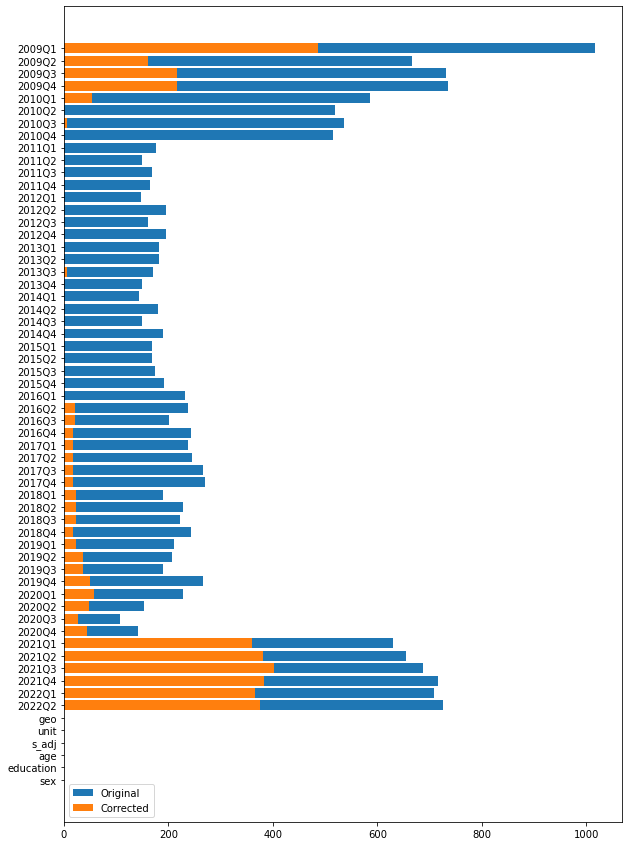

In [252]:
drop_missing_outliers(unemployment_all, df_un_otliers, "df_un_removed_outliers")

           Original  Corrected Percentage reduction
s_adj             0          0       not applicable
education         0          0       not applicable
sex               0          0       not applicable
age               0          0       not applicable
unit              0          0       not applicable
geo               0          0       not applicable
2022Q2          999        264                  74%
2022Q1         1005        270                  73%
2021Q4         1032        297                  71%
2021Q3         1011        282                  72%
2021Q2         1047        318                  70%
2021Q1         1104        369                  67%
2020Q4        10935       9720                  11%
2020Q3        10935       9720                  11%
2020Q2        10935       9720                  11%
2020Q1        10935       9720                  11%
2019Q4        10692       9720                   9%
2019Q3        10692       9720                   9%
2019Q2      

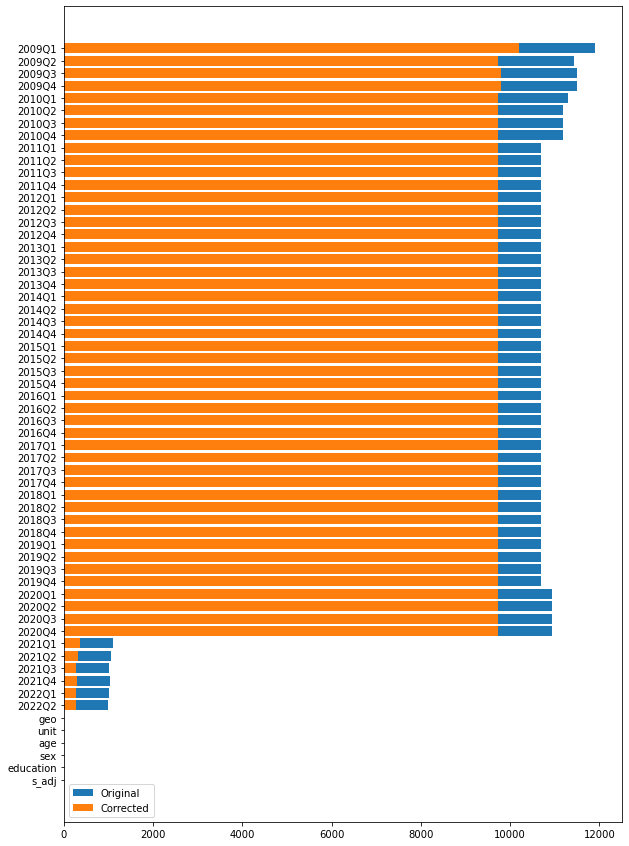

In [253]:
drop_missing_outliers(employment_all, df_em_otliers, "df_em_removed_outliers")

The conclusions from this step is that you should never do anything with missing data without examining it for a pattern in the first place. Second, in the unemployment rate, a pattern was demonstrated and deleting specific values greatly improved the quality of the data. Third, in the case of the occupancy rate, the presence of a pattern was proven, which will be used to delete the specific elements from the "age" feature.

### Step three. Precessing
#### In this step, we create the possibility of transformations of the data in different form and its best visualization
- filter by items, observations
- feature filtering
- adding a column with the full names of the countries and remove "geo" feature with their abbreviations
- rearrangement of features with periods for greater logical sequence

#### Filter by items, observations
It is important to specify the main elements that are important - constant for the analysis. These are:
- unit of measurement (the main unit of measurement is the unemployment/employment rate as a percentage of the economically active population). The absolute values ​​for the difference in the size of the population of the countries does not give us the necessary information.
- age - we choose the largest age frame, 15 - 74 years, since 15 years is the age for the right to work, and in increasing age, 74 is still achievable for active use of the workforce
- seasonal adjustment - we choose the default option (seasonally adjusted but not calendar adjusted)

For more information on the methodology:
https://ec.europa.eu/eurostat/cache/metadata/en/lfsi_esms.htm

A function has been created to filter the database by observations and display the result under a new name.

In [254]:
def filter_rows (df, df_name, **kwargs):
    keys = []
    values = []
    for key, value in kwargs.items():
        keys += [key]
        values += [value]
    globals()[df_name] =  df[df[keys].apply(lambda x: list(x.values) == values, axis=1)]
    return globals()[df_name]

In [255]:
filter_rows(df_un_removed_outliers, "un_filter_rows", unit= "PC_ACT", age = "Y15-74", s_adj = "SA")

,sex,education,age,s_adj,unit,geo,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
108,F,ED0-2,Y15-74,SA,PC_ACT,AT,9.4,11.0,10.9,11.5,...,8.5,8.7,7.5,8.5,8.6,8.3,8.8,11.6,9.6,9.2
109,F,ED0-2,Y15-74,SA,PC_ACT,BE,16.6,12.7,11.1,13.6,...,15.1,15.2,17.6,18.1,16.0,16.3,15.0,15.4,15.7,16.2
110,F,ED0-2,Y15-74,SA,PC_ACT,BG,17.0,15.3,14.0,16.9,...,32.1,32.0,30.4,27.0,26.2,23.5,21.7,21.4,18.8,18.8
111,F,ED0-2,Y15-74,SA,PC_ACT,CH,9.4,9.1,8.7,8.2,...,7.3,8.5,7.7,8.4,7.9,9.0,8.6,8.8,8.1,NaN
112,F,ED0-2,Y15-74,SA,PC_ACT,CY,8.9,5.5,9.3,9.4,...,4.5,4.9,4.1,4.8,5.6,6.1,5.4,5.3,5.5,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,T,ED5-8,Y15-74,SA,PC_ACT,RS,6.6,6.4,7.8,8.9,...,16.0,15.1,14.1,14.0,13.1,NaN,NaN,NaN,NaN,NaN
5324,T,ED5-8,Y15-74,SA,PC_ACT,SE,3.5,3.8,3.6,4.1,...,3.6,3.7,3.7,4.1,4.1,4.4,4.3,4.0,3.9,3.4
5325,T,ED5-8,Y15-74,SA,PC_ACT,SI,2.7,2.8,3.1,2.8,...,5.6,4.8,5.1,4.5,4.6,4.5,3.5,3.6,3.0,3.7
5326,T,ED5-8,Y15-74,SA,PC_ACT,SK,2.3,2.4,2.5,2.6,...,4.8,5.1,4.9,5.0,5.1,4.5,4.5,3.8,3.3,2.8


In [256]:
filter_rows(df_em_removed_outliers, "em_filter_rows", unit= "PC_POP", age = "Y15-74", s_adj = "SA")

,s_adj,education,sex,age,unit,geo,2022Q2,2022Q1,2021Q4,2021Q3,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
6822,SA,ED0-2,F,Y15-74,PC_POP,AT,34.2,33.9,34.7,35.0,...,36.3,36.6,37.1,36.6,35.6,36.5,35.9,36.3,36.5,37.0
6823,SA,ED0-2,F,Y15-74,PC_POP,BE,21.3,20.9,21.0,21.4,...,23.3,22.7,24.0,23.4,24.0,24.3,22.8,22.0,24.2,23.0
6824,SA,ED0-2,F,Y15-74,PC_POP,BG,22.4,23.3,22.6,21.4,...,16.8,16.6,17.1,18.0,19.0,18.9,18.4,19.2,20.5,20.0
6825,SA,ED0-2,F,Y15-74,PC_POP,CH,46.4,45.5,47.8,48.1,...,49.4,48.9,48.0,47.6,48.4,48.6,48.3,48.2,49.1,NaN
6826,SA,ED0-2,F,Y15-74,PC_POP,CY,29.0,28.4,28.3,29.3,...,36.7,37.3,37.9,38.1,38.3,37.7,36.7,35.9,33.6,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,SA,ED5-8,T,Y15-74,PC_POP,PL,83.6,83.8,83.6,83.1,...,78.8,79.2,79.4,78.9,79.5,79.2,80.0,79.1,81.1,81.1
12612,SA,ED5-8,T,Y15-74,PC_POP,RO,84.2,83.3,82.7,83.9,...,79.3,79.1,78.6,79.1,80.3,78.1,79.2,82.1,82.3,81.6
12614,SA,ED5-8,T,Y15-74,PC_POP,SE,81.9,81.5,81.6,81.2,...,78.6,79.0,78.9,78.9,78.8,79.0,79.3,79.4,79.8,79.9
12615,SA,ED5-8,T,Y15-74,PC_POP,SI,81.4,81.7,82.1,82.1,...,77.2,75.8,76.7,77.5,77.5,77.1,79.1,79.4,78.7,78.4


#### Feature filtering
After we have filtered the feature above which we use as constants for the analysis, they are now redundant and we can remove them. In this substep, a function is created again to filter the feature and name the result of the new database.

In [257]:
def filter_columns (df, use, name, *args):
    if use == "add":
        globals()[name] = df[df[col].isin([value]) == False]
        globals()[name] = df.filter(list(args))
        return globals()[name]
    elif use == "drop":
        globals()[name] = df.copy()
        globals()[name].drop(list(args), axis=1, inplace=True)
        return globals()[name]

In [258]:
filter_columns(un_filter_rows, "drop", "un_filter_columns" , "age", "unit", "s_adj")

,sex,education,geo,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,2021Q1,2020Q4,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
108,F,ED0-2,AT,9.4,11.0,10.9,11.5,13.9,13.8,12.0,...,8.5,8.7,7.5,8.5,8.6,8.3,8.8,11.6,9.6,9.2
109,F,ED0-2,BE,16.6,12.7,11.1,13.6,15.9,19.6,14.7,...,15.1,15.2,17.6,18.1,16.0,16.3,15.0,15.4,15.7,16.2
110,F,ED0-2,BG,17.0,15.3,14.0,16.9,21.4,21.3,21.9,...,32.1,32.0,30.4,27.0,26.2,23.5,21.7,21.4,18.8,18.8
111,F,ED0-2,CH,9.4,9.1,8.7,8.2,11.1,12.0,9.9,...,7.3,8.5,7.7,8.4,7.9,9.0,8.6,8.8,8.1,NaN
112,F,ED0-2,CY,8.9,5.5,9.3,9.4,13.4,7.1,9.4,...,4.5,4.9,4.1,4.8,5.6,6.1,5.4,5.3,5.5,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,T,ED5-8,RS,6.6,6.4,7.8,8.9,8.6,9.4,9.3,...,16.0,15.1,14.1,14.0,13.1,NaN,NaN,NaN,NaN,NaN
5324,T,ED5-8,SE,3.5,3.8,3.6,4.1,4.6,4.9,4.4,...,3.6,3.7,3.7,4.1,4.1,4.4,4.3,4.0,3.9,3.4
5325,T,ED5-8,SI,2.7,2.8,3.1,2.8,2.8,4.5,3.5,...,5.6,4.8,5.1,4.5,4.6,4.5,3.5,3.6,3.0,3.7
5326,T,ED5-8,SK,2.3,2.4,2.5,2.6,3.0,3.6,3.2,...,4.8,5.1,4.9,5.0,5.1,4.5,4.5,3.8,3.3,2.8


In [259]:
filter_columns(em_filter_rows, "drop", "em_filter_columns" , "age", "unit", "s_adj")

,education,sex,geo,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,2021Q1,2020Q4,...,2011Q2,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1
6822,ED0-2,F,AT,34.2,33.9,34.7,35.0,34.5,33.5,33.9,...,36.3,36.6,37.1,36.6,35.6,36.5,35.9,36.3,36.5,37.0
6823,ED0-2,F,BE,21.3,20.9,21.0,21.4,20.2,18.6,19.6,...,23.3,22.7,24.0,23.4,24.0,24.3,22.8,22.0,24.2,23.0
6824,ED0-2,F,BG,22.4,23.3,22.6,21.4,20.4,20.4,21.1,...,16.8,16.6,17.1,18.0,19.0,18.9,18.4,19.2,20.5,20.0
6825,ED0-2,F,CH,46.4,45.5,47.8,48.1,44.5,45.3,47.6,...,49.4,48.9,48.0,47.6,48.4,48.6,48.3,48.2,49.1,NaN
6826,ED0-2,F,CY,29.0,28.4,28.3,29.3,27.7,28.1,28.2,...,36.7,37.3,37.9,38.1,38.3,37.7,36.7,35.9,33.6,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,ED5-8,T,PL,83.6,83.8,83.6,83.1,83.5,83.1,82.3,...,78.8,79.2,79.4,78.9,79.5,79.2,80.0,79.1,81.1,81.1
12612,ED5-8,T,RO,84.2,83.3,82.7,83.9,82.9,81.4,82.3,...,79.3,79.1,78.6,79.1,80.3,78.1,79.2,82.1,82.3,81.6
12614,ED5-8,T,SE,81.9,81.5,81.6,81.2,79.8,79.1,79.0,...,78.6,79.0,78.9,78.9,78.8,79.0,79.3,79.4,79.8,79.9
12615,ED5-8,T,SI,81.4,81.7,82.1,82.1,81.3,78.3,80.1,...,77.2,75.8,76.7,77.5,77.5,77.1,79.1,79.4,78.7,78.4


#### Adding a feature with the full names of the countries and remove "geo" column with their abbreviations
In this step, we create a feature with the full name of the countries and remove the redundant geo feature with their abbreviations. This is done both for the greater convenience of the analysis and because of the need for the full names of the countries in some of the graphs.

In [260]:
un_filter_columns["country"] = un_filter_columns["geo"].replace(pytz.country_names)
un_filter_columns.drop(["geo"], axis=1, inplace=True)
un_filter_columns

,sex,education,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,2021Q1,2020Q4,2020Q3,...,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,country
108,F,ED0-2,9.4,11.0,10.9,11.5,13.9,13.8,12.0,12.5,...,8.7,7.5,8.5,8.6,8.3,8.8,11.6,9.6,9.2,Austria
109,F,ED0-2,16.6,12.7,11.1,13.6,15.9,19.6,14.7,15.0,...,15.2,17.6,18.1,16.0,16.3,15.0,15.4,15.7,16.2,Belgium
110,F,ED0-2,17.0,15.3,14.0,16.9,21.4,21.3,21.9,21.8,...,32.0,30.4,27.0,26.2,23.5,21.7,21.4,18.8,18.8,Bulgaria
111,F,ED0-2,9.4,9.1,8.7,8.2,11.1,12.0,9.9,9.7,...,8.5,7.7,8.4,7.9,9.0,8.6,8.8,8.1,NaN,Switzerland
112,F,ED0-2,8.9,5.5,9.3,9.4,13.4,7.1,9.4,8.4,...,4.9,4.1,4.8,5.6,6.1,5.4,5.3,5.5,4.6,Cyprus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,T,ED5-8,6.6,6.4,7.8,8.9,8.6,9.4,9.3,8.0,...,15.1,14.1,14.0,13.1,NaN,NaN,NaN,NaN,NaN,Serbia
5324,T,ED5-8,3.5,3.8,3.6,4.1,4.6,4.9,4.4,4.5,...,3.7,3.7,4.1,4.1,4.4,4.3,4.0,3.9,3.4,Sweden
5325,T,ED5-8,2.7,2.8,3.1,2.8,2.8,4.5,3.5,2.6,...,4.8,5.1,4.5,4.6,4.5,3.5,3.6,3.0,3.7,Slovenia
5326,T,ED5-8,2.3,2.4,2.5,2.6,3.0,3.6,3.2,3.3,...,5.1,4.9,5.0,5.1,4.5,4.5,3.8,3.3,2.8,Slovakia


In [261]:
em_filter_columns["country"] = em_filter_columns["geo"].replace(pytz.country_names)
em_filter_columns.drop(["geo"], axis=1, inplace=True)
em_filter_columns

,education,sex,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,2021Q1,2020Q4,2020Q3,...,2011Q1,2010Q4,2010Q3,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,country
6822,ED0-2,F,34.2,33.9,34.7,35.0,34.5,33.5,33.9,34.1,...,36.6,37.1,36.6,35.6,36.5,35.9,36.3,36.5,37.0,Austria
6823,ED0-2,F,21.3,20.9,21.0,21.4,20.2,18.6,19.6,20.5,...,22.7,24.0,23.4,24.0,24.3,22.8,22.0,24.2,23.0,Belgium
6824,ED0-2,F,22.4,23.3,22.6,21.4,20.4,20.4,21.1,21.6,...,16.6,17.1,18.0,19.0,18.9,18.4,19.2,20.5,20.0,Bulgaria
6825,ED0-2,F,46.4,45.5,47.8,48.1,44.5,45.3,47.6,46.3,...,48.9,48.0,47.6,48.4,48.6,48.3,48.2,49.1,NaN,Switzerland
6826,ED0-2,F,29.0,28.4,28.3,29.3,27.7,28.1,28.2,28.3,...,37.3,37.9,38.1,38.3,37.7,36.7,35.9,33.6,32.4,Cyprus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,ED5-8,T,83.6,83.8,83.6,83.1,83.5,83.1,82.3,82.5,...,79.2,79.4,78.9,79.5,79.2,80.0,79.1,81.1,81.1,Poland
12612,ED5-8,T,84.2,83.3,82.7,83.9,82.9,81.4,82.3,82.7,...,79.1,78.6,79.1,80.3,78.1,79.2,82.1,82.3,81.6,Romania
12614,ED5-8,T,81.9,81.5,81.6,81.2,79.8,79.1,79.0,78.8,...,79.0,78.9,78.9,78.8,79.0,79.3,79.4,79.8,79.9,Sweden
12615,ED5-8,T,81.4,81.7,82.1,82.1,81.3,78.3,80.1,79.1,...,75.8,76.7,77.5,77.5,77.1,79.1,79.4,78.7,78.4,Slovenia


#### Rearrangement of features with periods for greater logical sequence
As a final step, the features are rearranged for greater convenience and logical consistency. As a result, we have refined databases containing the necessary to do the analysis.

In [262]:
unemployment_precice = un_filter_columns[list(un_filter_columns.columns[:2]) + list(un_filter_columns.columns[:1:-1])]
unemployment_precice

,sex,education,country,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,...,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2
108,F,ED0-2,Austria,9.2,9.6,11.6,8.8,8.3,8.6,8.5,...,8.9,13.3,12.5,12.0,13.8,13.9,11.5,10.9,11.0,9.4
109,F,ED0-2,Belgium,16.2,15.7,15.4,15.0,16.3,16.0,18.1,...,13.4,12.7,15.0,14.7,19.6,15.9,13.6,11.1,12.7,16.6
110,F,ED0-2,Bulgaria,18.8,18.8,21.4,21.7,23.5,26.2,27.0,...,17.9,19.3,21.8,21.9,21.3,21.4,16.9,14.0,15.3,17.0
111,F,ED0-2,Switzerland,NaN,8.1,8.8,8.6,9.0,7.9,8.4,...,7.9,8.9,9.7,9.9,12.0,11.1,8.2,8.7,9.1,9.4
112,F,ED0-2,Cyprus,4.6,5.5,5.3,5.4,6.1,5.6,4.8,...,7.3,7.1,8.4,9.4,7.1,13.4,9.4,9.3,5.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,T,ED5-8,Serbia,NaN,NaN,NaN,NaN,NaN,13.1,14.0,...,7.7,7.0,8.0,9.3,9.4,8.6,8.9,7.8,6.4,6.6
5324,T,ED5-8,Sweden,3.4,3.9,4.0,4.3,4.4,4.1,4.1,...,3.5,4.1,4.5,4.4,4.9,4.6,4.1,3.6,3.8,3.5
5325,T,ED5-8,Slovenia,3.7,3.0,3.6,3.5,4.5,4.6,4.5,...,3.5,3.9,2.6,3.5,4.5,2.8,2.8,3.1,2.8,2.7
5326,T,ED5-8,Slovakia,2.8,3.3,3.8,4.5,4.5,5.1,5.0,...,2.3,2.9,3.3,3.2,3.6,3.0,2.6,2.5,2.4,2.3


In [263]:
%store unemployment_precice

Stored 'unemployment_precice' (DataFrame)


In [264]:
employment_precice = em_filter_columns[list(em_filter_columns.columns[:2]) + list(em_filter_columns.columns[:1:-1])]
employment_precice

,education,sex,country,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,...,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2
6822,ED0-2,F,Austria,37.0,36.5,36.3,35.9,36.5,35.6,36.6,...,36.7,32.8,34.1,33.9,33.5,34.5,35.0,34.7,33.9,34.2
6823,ED0-2,F,Belgium,23.0,24.2,22.0,22.8,24.3,24.0,23.4,...,21.0,20.8,20.5,19.6,18.6,20.2,21.4,21.0,20.9,21.3
6824,ED0-2,F,Bulgaria,20.0,20.5,19.2,18.4,18.9,19.0,18.0,...,22.6,20.9,21.6,21.1,20.4,20.4,21.4,22.6,23.3,22.4
6825,ED0-2,F,Switzerland,NaN,49.1,48.2,48.3,48.6,48.4,47.6,...,47.8,46.9,46.3,47.6,45.3,44.5,48.1,47.8,45.5,46.4
6826,ED0-2,F,Cyprus,32.4,33.6,35.9,36.7,37.7,38.3,38.1,...,29.0,28.7,28.3,28.2,28.1,27.7,29.3,28.3,28.4,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,ED5-8,T,Poland,81.1,81.1,79.1,80.0,79.2,79.5,78.9,...,82.8,81.7,82.5,82.3,83.1,83.5,83.1,83.6,83.8,83.6
12612,ED5-8,T,Romania,81.6,82.3,82.1,79.2,78.1,80.3,79.1,...,83.4,82.5,82.7,82.3,81.4,82.9,83.9,82.7,83.3,84.2
12614,ED5-8,T,Sweden,79.9,79.8,79.4,79.3,79.0,78.8,78.9,...,80.3,79.0,78.8,79.0,79.1,79.8,81.2,81.6,81.5,81.9
12615,ED5-8,T,Slovenia,78.4,78.7,79.4,79.1,77.1,77.5,77.5,...,80.6,79.4,79.1,80.1,78.3,81.3,82.1,82.1,81.7,81.4


In [265]:
%store employment_precice

Stored 'employment_precice' (DataFrame)


#### Step Four - Shaping and Transofrmation
In this step, we prepare the data for visualization and analysis using basic transformation functions. In this way, we will create several databases that will be the basis of the next step. The main transformation functions are as follows:

- create function for stuck - unstuck and databases
- create melt function and databases
- create merge funcion and databases

#### Create function for stuck - unstuck
The function created in this substep aims to facilitate the rearrangement of the data in a form convenient for analysis.

In [266]:
def stack_unstack (df, name, arg1, arg2, *args):
    globals()[name] = df.set_index(list(args)).rename_axis([arg1], axis=1).stack().unstack(arg2).reset_index()
    return globals()[name]

In [267]:
stack_unstack(unemployment_precice, "un_sex_all", 'Year', 'sex' ,'sex', "education", "country")

sex,education,country,Year,F,M,T
0,ED0-2,Austria,2009Q1,9.2,12.6,10.7
1,ED0-2,Austria,2009Q2,9.6,12.9,11.1
2,ED0-2,Austria,2009Q3,11.6,15.0,13.2
3,ED0-2,Austria,2009Q4,8.8,15.4,11.9
4,ED0-2,Austria,2010Q1,8.3,13.3,10.6
...,...,...,...,...,...,...
4798,ED5-8,Turkey,2019Q4,18.3,8.9,12.7
4799,ED5-8,Turkey,2020Q1,15.9,9.1,11.9
4800,ED5-8,Turkey,2020Q2,15.4,9.8,12.1
4801,ED5-8,Turkey,2020Q3,17.6,10.4,13.4


In [268]:
stack_unstack(unemployment_precice, "un_edu_all", 'Year', 'education' ,'sex', "education", "country")

education,sex,country,Year,ED0-2,ED3_4,ED5-8
0,F,Austria,2009Q1,9.2,4.3,3.1
1,F,Austria,2009Q2,9.6,4.3,3.6
2,F,Austria,2009Q3,11.6,5.1,2.4
3,F,Austria,2009Q4,8.8,4.6,3.5
4,F,Austria,2010Q1,8.3,4.7,2.4
...,...,...,...,...,...,...
4798,T,Turkey,2019Q4,12.6,15.7,12.7
4799,T,Turkey,2020Q1,13.5,15.4,11.9
4800,T,Turkey,2020Q2,13.2,14.2,12.1
4801,T,Turkey,2020Q3,12.0,15.6,13.4


In [269]:
stack_unstack(employment_precice, "em_sex_all", 'Year', 'sex' ,'sex', "education", "country")

sex,education,country,Year,F,M,T
0,ED0-2,Austria,2009Q1,37.0,46.1,40.6
1,ED0-2,Austria,2009Q2,36.5,46.1,40.2
2,ED0-2,Austria,2009Q3,36.3,46.3,40.1
3,ED0-2,Austria,2009Q4,35.9,45.8,39.7
4,ED0-2,Austria,2010Q1,36.5,46.0,40.2
...,...,...,...,...,...,...
4849,ED5-8,Switzerland,2021Q2,79.8,84.6,82.4
4850,ED5-8,Switzerland,2021Q3,79.3,84.1,81.9
4851,ED5-8,Switzerland,2021Q4,79.9,84.5,82.4
4852,ED5-8,Switzerland,2022Q1,79.4,84.9,82.3


In [270]:
stack_unstack(employment_precice, "em_edu_all", 'Year', 'education' ,'sex', "education", "country")

education,sex,country,Year,ED0-2,ED3_4,ED5-8
0,F,Austria,2009Q1,37.0,63.7,78.1
1,F,Austria,2009Q2,36.5,64.4,77.3
2,F,Austria,2009Q3,36.3,63.5,77.7
3,F,Austria,2009Q4,35.9,63.9,76.4
4,F,Austria,2010Q1,36.5,63.9,77.1
...,...,...,...,...,...,...
4849,T,Switzerland,2021Q2,51.6,68.9,82.4
4850,T,Switzerland,2021Q3,53.5,69.8,81.9
4851,T,Switzerland,2021Q4,53.7,70.3,82.4
4852,T,Switzerland,2022Q1,52.5,69.8,82.3


#### Create melt function
The function created in this substep aims to facilitate the rearrangement of the data in a form convenient for analysis.

In [271]:
def melt(df, name, arg1, arg2, *args):
    globals()[name]=df.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    return globals()[name]

In [272]:
melt(unemployment_precice,"un_melt_all", 'Date', 'Value' ,'sex', "education" , "country" )

,sex,education,country,Date,Value
0,F,ED0-2,Austria,2009Q1,9.2
1,F,ED0-2,Belgium,2009Q1,16.2
2,F,ED0-2,Bulgaria,2009Q1,18.8
3,F,ED0-2,Switzerland,2009Q1,NaN
4,F,ED0-2,Cyprus,2009Q1,4.6
...,...,...,...,...,...
14575,T,ED5-8,Serbia,2022Q2,6.6
14576,T,ED5-8,Sweden,2022Q2,3.5
14577,T,ED5-8,Slovenia,2022Q2,2.7
14578,T,ED5-8,Slovakia,2022Q2,2.3


In [273]:
melt(employment_precice,"em_melt_all", 'Date', 'Value' ,'sex', "education" , "country" )

,sex,education,country,Date,Value
0,F,ED0-2,Austria,2009Q1,37.0
1,F,ED0-2,Belgium,2009Q1,23.0
2,F,ED0-2,Bulgaria,2009Q1,20.0
3,F,ED0-2,Switzerland,2009Q1,NaN
4,F,ED0-2,Cyprus,2009Q1,32.4
...,...,...,...,...,...
14575,T,ED5-8,Poland,2022Q2,83.6
14576,T,ED5-8,Romania,2022Q2,84.2
14577,T,ED5-8,Sweden,2022Q2,81.9
14578,T,ED5-8,Slovenia,2022Q2,81.4


#### Create Merge funcion
through merge we manage to create a common database between employment and unemployment rates for comparison between them.

In [274]:
def merge(name, db1, db2, **kwargs):
    values = []
    for key, value in kwargs.items():
        values += [value]
    globals()[name]=pd.merge(db1, db2, on=(values))
    return globals()[name]

In [275]:
merge("merge_all_education", un_edu_all, em_edu_all, a="country",b="sex", c="Year")

education,sex,country,Year,ED0-2_x,ED3_4_x,ED5-8_x,ED0-2_y,ED3_4_y,ED5-8_y
0,F,Austria,2009Q1,9.2,4.3,3.1,37.0,63.7,78.1
1,F,Austria,2009Q2,9.6,4.3,3.6,36.5,64.4,77.3
2,F,Austria,2009Q3,11.6,5.1,2.4,36.3,63.5,77.7
3,F,Austria,2009Q4,8.8,4.6,3.5,35.9,63.9,76.4
4,F,Austria,2010Q1,8.3,4.7,2.4,36.5,63.9,77.1
...,...,...,...,...,...,...,...,...,...
4201,T,Switzerland,2021Q2,10.4,5.3,3.4,51.6,68.9,82.4
4202,T,Switzerland,2021Q3,8.4,5.1,3.5,53.5,69.8,81.9
4203,T,Switzerland,2021Q4,9.1,4.6,3.1,53.7,70.3,82.4
4204,T,Switzerland,2022Q1,9.1,4.3,3.3,52.5,69.8,82.3


In [276]:
punctuation_ckeck(merge_all_education)

Features names without special characters are: 
 ['sex', 'country', 'Year']
--------
Features with the presence of special characters in their names and need to be reviewed for corrections are: 
 ['ED0-2_x', 'ED3_4_x', 'ED5-8_x', 'ED0-2_y', 'ED3_4_y', 'ED5-8_y']
--------
Correct table by removing the following punctuation marks: '[^\w\s]', ''


education,sex,country,Year,ED02_x,ED3_4_x,ED58_x,ED02_y,ED3_4_y,ED58_y
0,F,Austria,2009Q1,9.2,4.3,3.1,37.0,63.7,78.1
1,F,Austria,2009Q2,9.6,4.3,3.6,36.5,64.4,77.3
2,F,Austria,2009Q3,11.6,5.1,2.4,36.3,63.5,77.7
3,F,Austria,2009Q4,8.8,4.6,3.5,35.9,63.9,76.4
4,F,Austria,2010Q1,8.3,4.7,2.4,36.5,63.9,77.1
...,...,...,...,...,...,...,...,...,...
4201,T,Switzerland,2021Q2,10.4,5.3,3.4,51.6,68.9,82.4
4202,T,Switzerland,2021Q3,8.4,5.1,3.5,53.5,69.8,81.9
4203,T,Switzerland,2021Q4,9.1,4.6,3.1,53.7,70.3,82.4
4204,T,Switzerland,2022Q1,9.1,4.3,3.3,52.5,69.8,82.3


In [277]:
rename_features(merge_all_education, ED02_x="ED0_2_un", ED3_4_x="ED3_4_un",ED58_x="ED5_8_un",
               ED02_y="ED0_2_em", ED3_4_y="ED3_4_em",ED58_y="ED5_8_em")
merge_all_education

education,sex,country,Year,ED0_2_un,ED3_4_un,ED5_8_un,ED0_2_em,ED3_4_em,ED5_8_em
0,F,Austria,2009Q1,9.2,4.3,3.1,37.0,63.7,78.1
1,F,Austria,2009Q2,9.6,4.3,3.6,36.5,64.4,77.3
2,F,Austria,2009Q3,11.6,5.1,2.4,36.3,63.5,77.7
3,F,Austria,2009Q4,8.8,4.6,3.5,35.9,63.9,76.4
4,F,Austria,2010Q1,8.3,4.7,2.4,36.5,63.9,77.1
...,...,...,...,...,...,...,...,...,...
4201,T,Switzerland,2021Q2,10.4,5.3,3.4,51.6,68.9,82.4
4202,T,Switzerland,2021Q3,8.4,5.1,3.5,53.5,69.8,81.9
4203,T,Switzerland,2021Q4,9.1,4.6,3.1,53.7,70.3,82.4
4204,T,Switzerland,2022Q1,9.1,4.3,3.3,52.5,69.8,82.3


In [278]:
merge("merge_all_sex", un_sex_all, em_sex_all, a="country",b="education", c="Year")

sex,education,country,Year,F_x,M_x,T_x,F_y,M_y,T_y
0,ED0-2,Austria,2009Q1,9.2,12.6,10.7,37.0,46.1,40.6
1,ED0-2,Austria,2009Q2,9.6,12.9,11.1,36.5,46.1,40.2
2,ED0-2,Austria,2009Q3,11.6,15.0,13.2,36.3,46.3,40.1
3,ED0-2,Austria,2009Q4,8.8,15.4,11.9,35.9,45.8,39.7
4,ED0-2,Austria,2010Q1,8.3,13.3,10.6,36.5,46.0,40.2
...,...,...,...,...,...,...,...,...,...
4201,ED5-8,Switzerland,2021Q2,3.7,3.3,3.4,79.8,84.6,82.4
4202,ED5-8,Switzerland,2021Q3,4.0,3.1,3.5,79.3,84.1,81.9
4203,ED5-8,Switzerland,2021Q4,3.3,2.9,3.1,79.9,84.5,82.4
4204,ED5-8,Switzerland,2022Q1,3.9,2.8,3.3,79.4,84.9,82.3


In [279]:
punctuation_ckeck(merge_all_sex)

Features names without special characters are: 
 ['education', 'country', 'Year']
--------
Features with the presence of special characters in their names and need to be reviewed for corrections are: 
 ['F_x', 'M_x', 'T_x', 'F_y', 'M_y', 'T_y']
--------
Correct table by removing the following punctuation marks: '[^\w\s]', ''


sex,education,country,Year,F_x,M_x,T_x,F_y,M_y,T_y
0,ED0-2,Austria,2009Q1,9.2,12.6,10.7,37.0,46.1,40.6
1,ED0-2,Austria,2009Q2,9.6,12.9,11.1,36.5,46.1,40.2
2,ED0-2,Austria,2009Q3,11.6,15.0,13.2,36.3,46.3,40.1
3,ED0-2,Austria,2009Q4,8.8,15.4,11.9,35.9,45.8,39.7
4,ED0-2,Austria,2010Q1,8.3,13.3,10.6,36.5,46.0,40.2
...,...,...,...,...,...,...,...,...,...
4201,ED5-8,Switzerland,2021Q2,3.7,3.3,3.4,79.8,84.6,82.4
4202,ED5-8,Switzerland,2021Q3,4.0,3.1,3.5,79.3,84.1,81.9
4203,ED5-8,Switzerland,2021Q4,3.3,2.9,3.1,79.9,84.5,82.4
4204,ED5-8,Switzerland,2022Q1,3.9,2.8,3.3,79.4,84.9,82.3


In [280]:
rename_features(merge_all_sex, F_x="F_un", M_x="M_un",T_x="T_un",
               F_y="F_em", M_y="M_em",T_y="T_em")
merge_all_sex

sex,education,country,Year,F_un,M_un,T_un,F_em,M_em,T_em
0,ED0-2,Austria,2009Q1,9.2,12.6,10.7,37.0,46.1,40.6
1,ED0-2,Austria,2009Q2,9.6,12.9,11.1,36.5,46.1,40.2
2,ED0-2,Austria,2009Q3,11.6,15.0,13.2,36.3,46.3,40.1
3,ED0-2,Austria,2009Q4,8.8,15.4,11.9,35.9,45.8,39.7
4,ED0-2,Austria,2010Q1,8.3,13.3,10.6,36.5,46.0,40.2
...,...,...,...,...,...,...,...,...,...
4201,ED5-8,Switzerland,2021Q2,3.7,3.3,3.4,79.8,84.6,82.4
4202,ED5-8,Switzerland,2021Q3,4.0,3.1,3.5,79.3,84.1,81.9
4203,ED5-8,Switzerland,2021Q4,3.3,2.9,3.1,79.9,84.5,82.4
4204,ED5-8,Switzerland,2022Q1,3.9,2.8,3.3,79.4,84.9,82.3


#### Step Five - Visualization and analys
In this step, the real part of the analysis is performed. The tools of both descriptive statistics and graphical analysis and correlation-regression analysis are actually used. In this way, the aim is to prove the author's thesis that in the dynamics of the labor market it is possible to define the presence of a model in the context of the level of education and gender and thus to refine the public policies of the labor market in order to increase its effectiveness.

- Visualization of EU member states and associated countries by unemployment and employment rate for the period under study.
- Visualization of EU and Bulgaria by unemployment and employment rate for the period under study.
- Visualization of unemployment and employment rate in Bulgaria.

#### Visualization of EU member states and associated countries by unemployment and employment rate for the period under study.
In this sub-step we will make a short analysis of the dynamics of the variables related to the labor market using catplot and map

In [281]:
un_melt_all

,sex,education,country,Date,Value
0,F,ED0-2,Austria,2009Q1,9.2
1,F,ED0-2,Belgium,2009Q1,16.2
2,F,ED0-2,Bulgaria,2009Q1,18.8
3,F,ED0-2,Switzerland,2009Q1,NaN
4,F,ED0-2,Cyprus,2009Q1,4.6
...,...,...,...,...,...
14575,T,ED5-8,Serbia,2022Q2,6.6
14576,T,ED5-8,Sweden,2022Q2,3.5
14577,T,ED5-8,Slovenia,2022Q2,2.7
14578,T,ED5-8,Slovakia,2022Q2,2.3


In [282]:
def catlot (df, x, y, hue, col, col_wrap):
    g1 = sns.catplot(x=x, y=y, hue =hue, col=col, col_wrap=col_wrap, data=df, kind="box", height=3, aspect=0.7);
    return g1

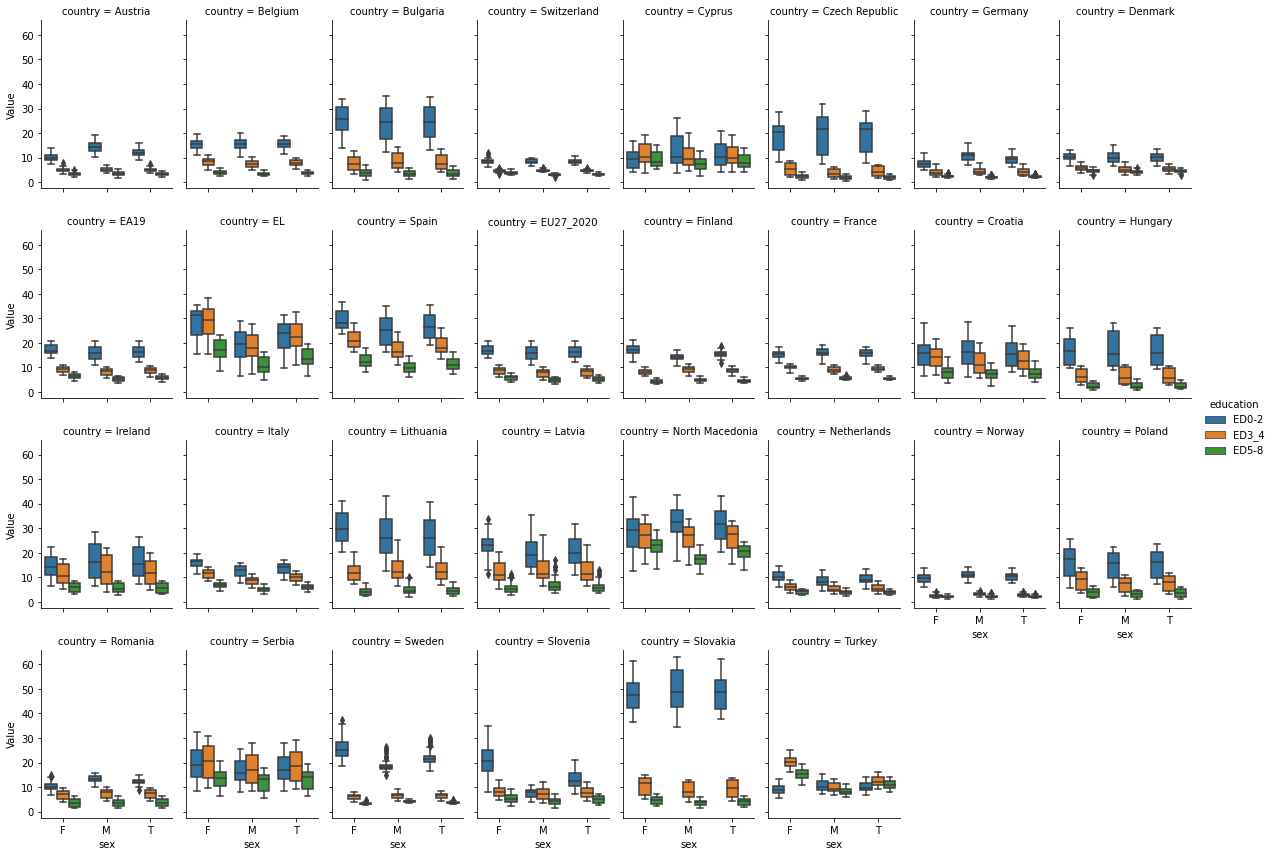

In [283]:
catlot(un_melt_all, "sex", "Value", "education", "country", 8)

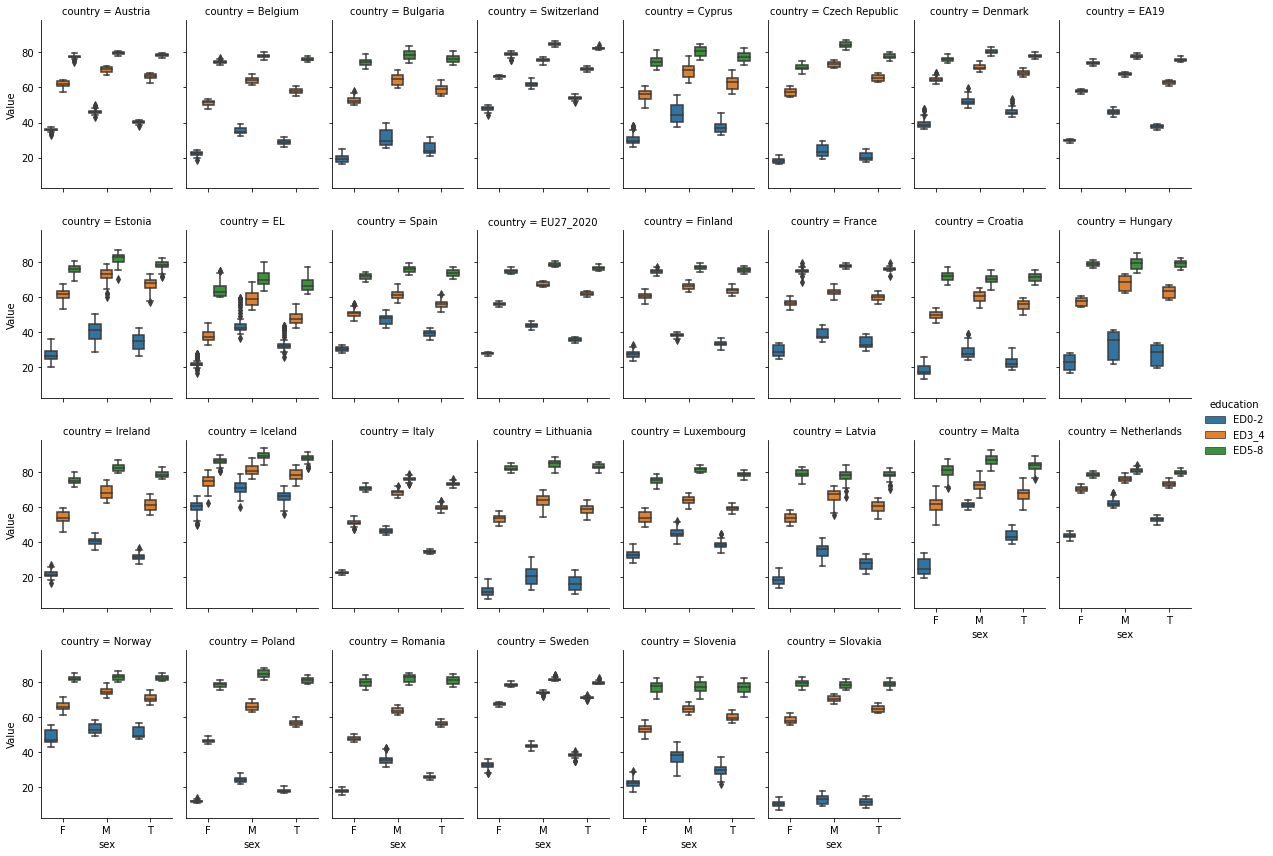

In [284]:
catlot(em_melt_all, "sex", "Value", "education", "country", 8)

from the graphs made for the unemployment rate and the employment rate by gender, education level and countries, we see the following:
- EU and associated countries vary enormously both in employment and unemployment rates and in the range of values by year
- Bulgaria is one of the countries with a large range of values in the studied period for both indicators.
- In order to investigate more precisely, a comparison between the labor market in Bulgaria and in the EU as an average value of the other countries is required.

Using a map of Europe, we visualize the level of employment and unemployment during the last studied period, overall by gender.

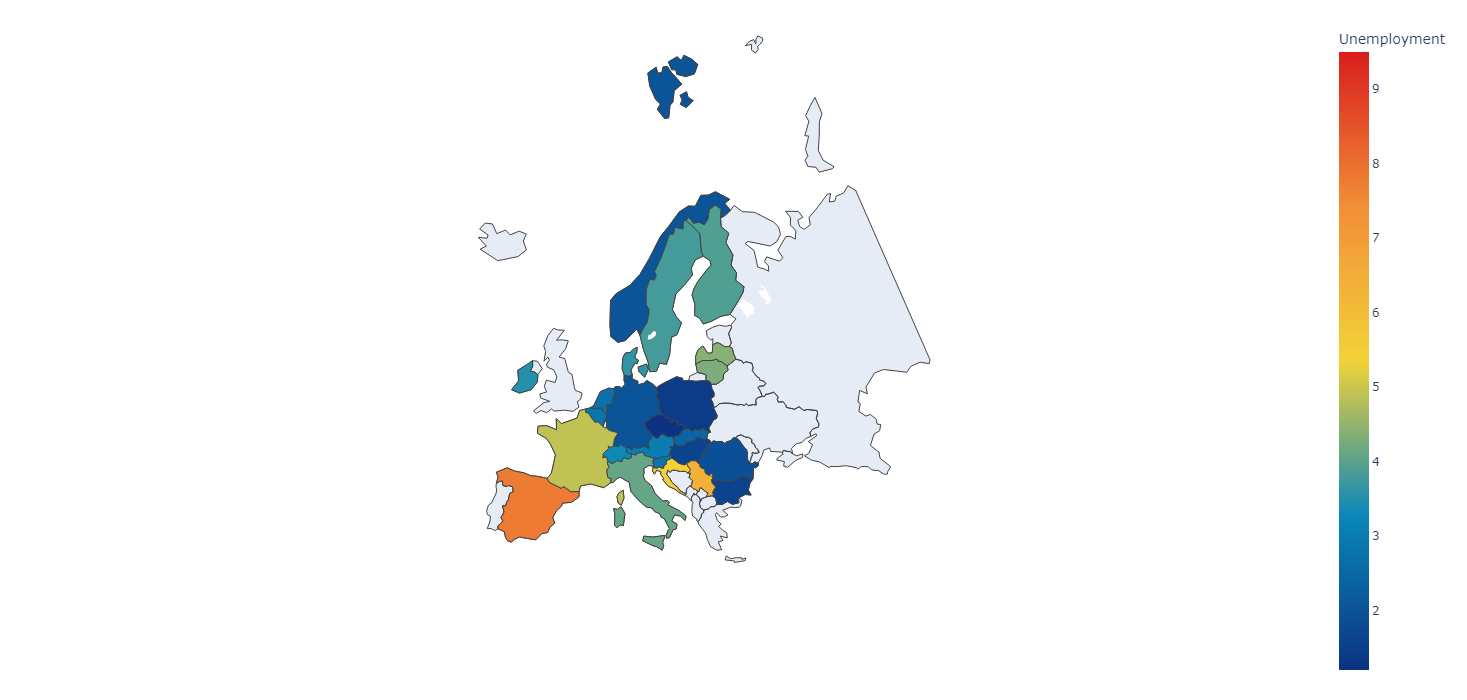

In [285]:
un_map_2022=un_melt_all[(un_melt_all['Date'].isin(["2022Q1"])) & (un_melt_all['sex'].isin(["T"])) & (un_melt_all['education'].isin(["ED5-8"]))]
em_map_2022=em_melt_all[(em_melt_all['Date'].isin(["2022Q1"])) & (em_melt_all['sex'].isin(["T"])) & (em_melt_all['education'].isin(["ED5-8"]))]

choropleth_map_2022_unemployment = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'country names',        
        'locations': un_map_2022['country'],
        'colorscale':'Portland', 
         "text":un_map_2022['country'],
        'z':un_map_2022["Value"],                  
        'colorbar':{'title':'Unemployment'}
    },     
    layout = {
      'geo':{
          'scope':'europe'
      }  
    })

choropleth_map_2022_unemployment.update_layout(
    autosize=False,
    width=700,
    height=700, margin=dict(l=20, r=20, t=20, b=20))

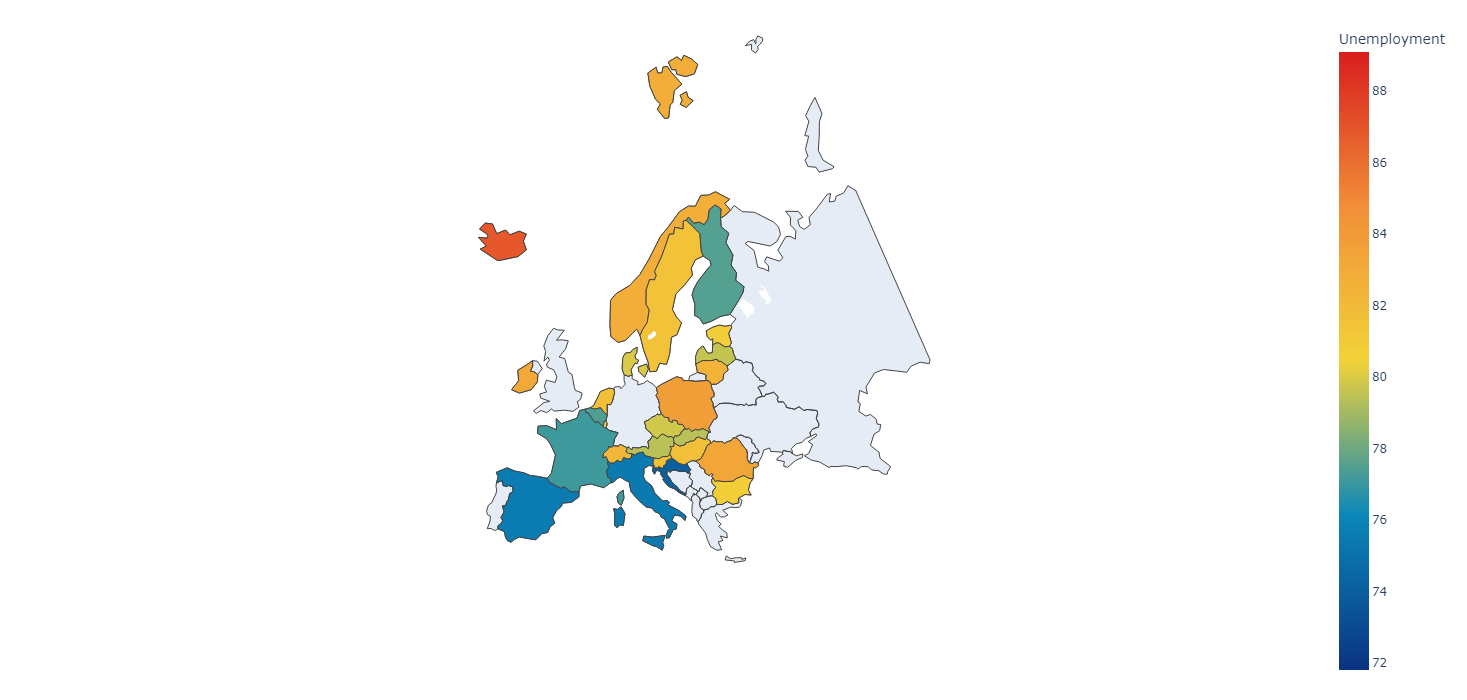

In [286]:
choropleth_map_2022_employment = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'country names',        
        'locations': em_map_2022['country'],
        'colorscale':'Portland', 
         "text":em_map_2022['country'],
        'z':em_map_2022["Value"],                  
        'colorbar':{'title':'Unemployment'}
    },     
    layout = {
      'geo':{
          'scope':'europe'
      }  
    })

choropleth_map_2022_employment.update_layout(
    autosize=False,
    width=700,
    height=700, margin=dict(l=20, r=20, t=20, b=20))

#### Visualization of EU and Bulgaria by unemployment and employment rate for the period under study.
In this sub-step, we will refine the analysis by paying attention to the dynamics of the level of unemployment and employment by demographic structures within the EU and Bulgaria.

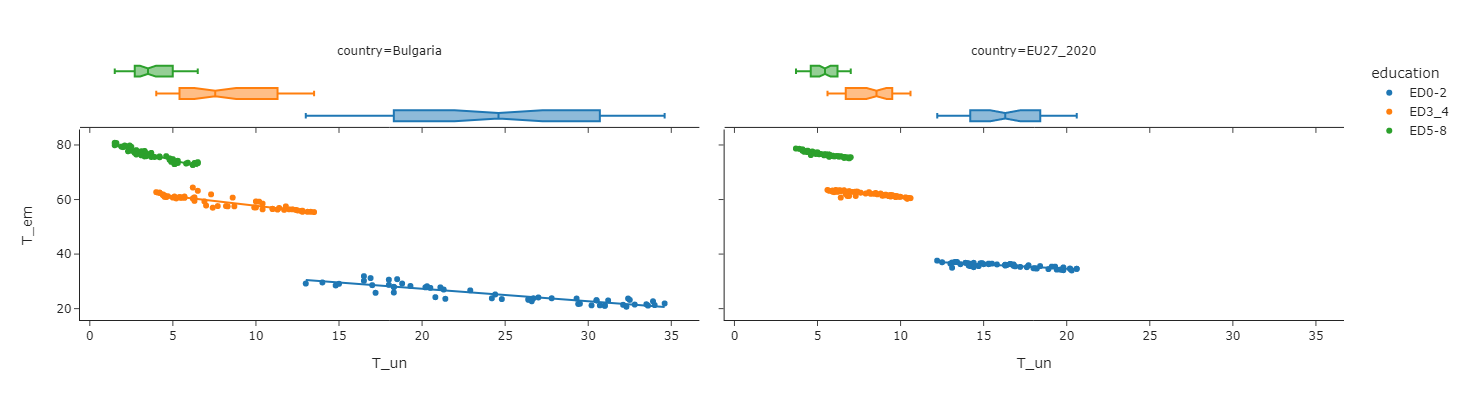

In [287]:
merge_bg_eu_sex=merge_all_sex[(merge_all_sex['country'].isin(["EU27_2020" ,"Bulgaria"]))]

fig = px.scatter(merge_bg_eu_sex, x="T_un", y="T_em", color="education", facet_col="country", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white", width=1000, height=400)
fig.show()

Тhrough the results of this graph we clearly see the following:

First: on the one hand, the relationship between the level of employment and unemployment, the inverse relationship between the two variables is clearly visible. This is understandable from the point of view of their role of measuring opposing processes within the labor market.

Second: the distribution between employment and unemployment by level of education is clearly divided. The higher the level of education, the higher the employment rate and the lower the unemployment rate. Also, with an increase in the level of education, both levels are more stable over time and do not show such large fluctuations.

Third: If the average and high level of education in Bulgaria and the EU are almost similar in terms of dynamics over the years and values, a significant difference is observed at the low level (0-2). In Bulgaria, there is a serious fluctuation in time period and very high unemployment rates.

--------------------------

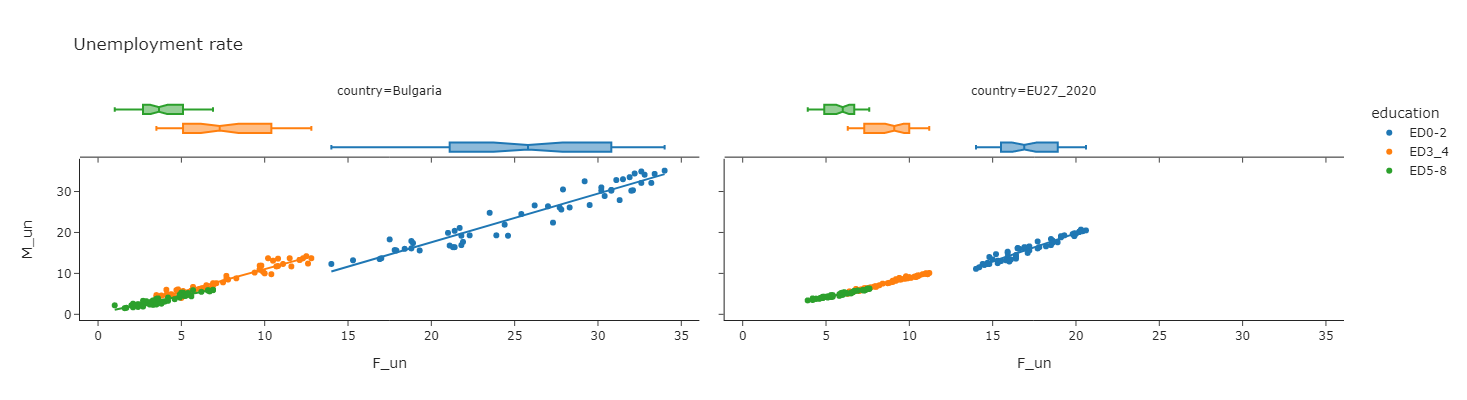

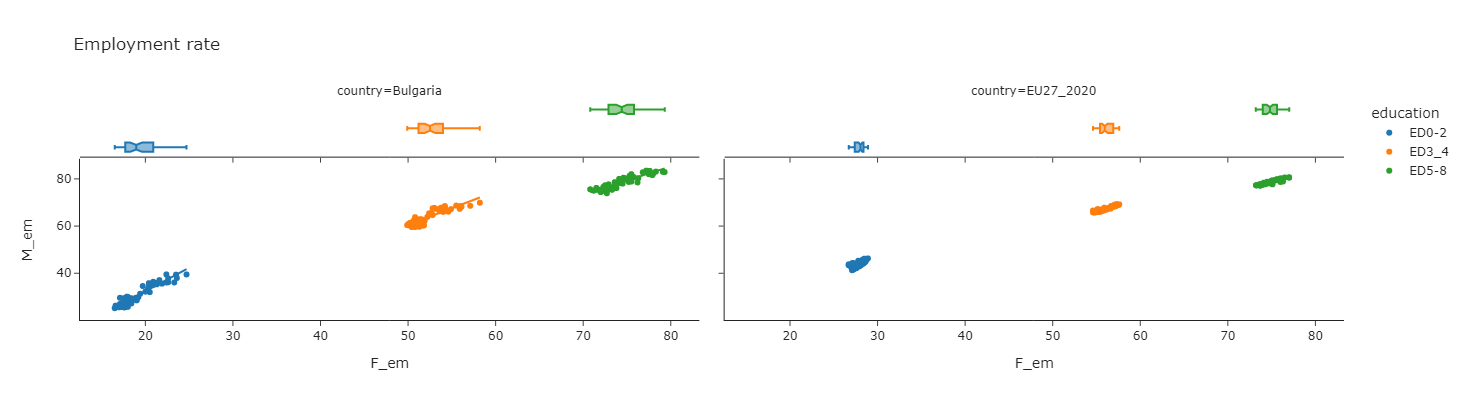

In [288]:
fig = px.scatter(merge_bg_eu_sex, x="F_un", y="M_un", color="education", facet_col="country", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white", width=1000, height=400, title="Unemployment rate")

fig1 = px.scatter(merge_bg_eu_sex, x="F_em", y="M_em", color="education", facet_col="country", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white", width=1000, height=400, title="Employment rate")
fig.show()
fig1.show()

The graph shows the relationship between unemployment and employment rates on the one hand and gender and education level on the other. We can draw the following conclusions:
First: it is obvious that the higher the level of education, the lower the unemployment rate, and the higher the employment rate.
Second: if for the unemployment rate there is a certain similarity between the average and high levels of education, then for the employment rate the differences are clearly distinguishable.
That is, a high level of education guarantees employment at levels unattainable for lower levels of education.

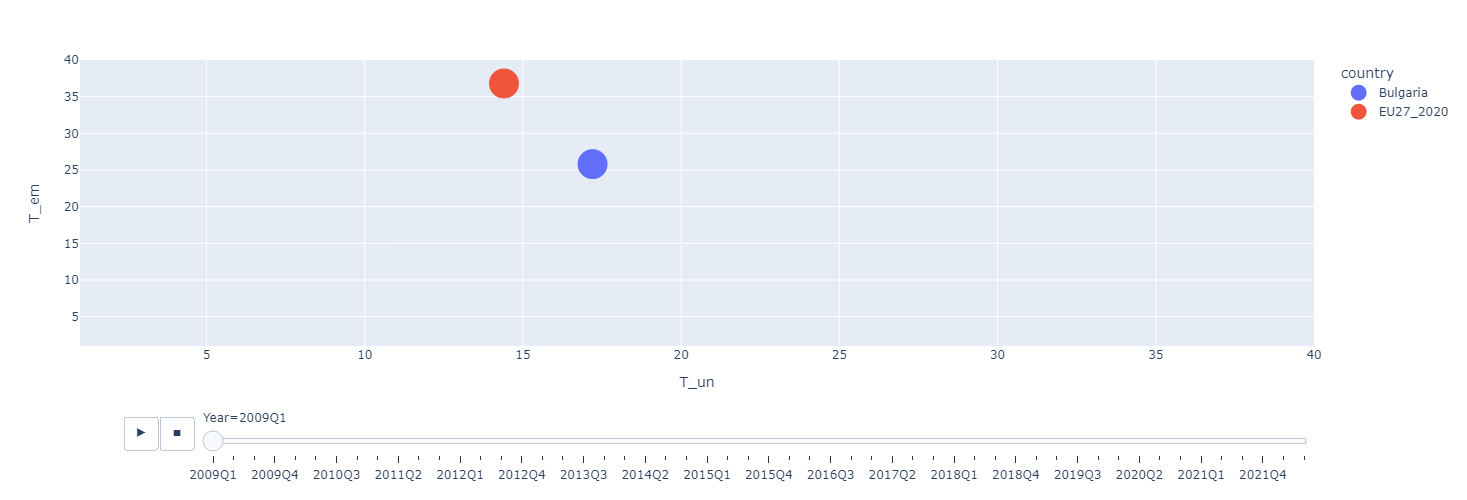

In [289]:
fig2 = px.scatter(merge_bg_eu_sex, x="T_un", y="T_em", animation_frame="Year", animation_group="country", color="country", hover_name="country",
            size_max=55, range_x=[1,40], range_y=[1,40],width=1200, height=500)
fig2.update_traces(marker_size=30)

the dynamics over a period of time shows that over the years Bulgaria initially moved away from the EU in terms of unemployment rate and employment rate. But in recent years there has been an improvement in the convergence of values between Bulgaria and the EU.




--------------------------

#### Visualization of unemployment and employment rate in Bulgaria.
Since the levels of employment and unemployment change in time order, it is good to derive the time dynamics in Bulgaria. In this way, it will be possible to precisely define the influence of the level of education and gender on the labor market.

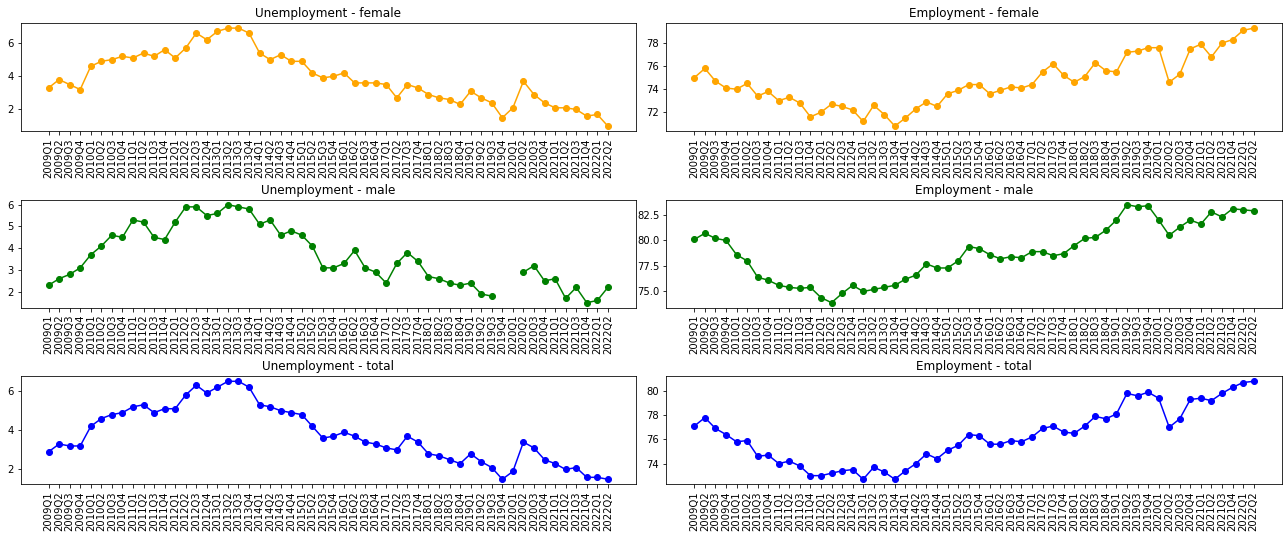

In [290]:
bg_sex_all=merge_bg_eu_sex[(merge_all_sex['country'].isin(["Bulgaria"])) & (merge_all_sex['education'].isin(["ED5-8"]))]
bg_edu_all=merge_all_education[(merge_all_education['country'].isin(["Bulgaria"])) & (merge_all_education['sex'].isin(["T"]))]

fig = plt.figure(figsize=(18,8))
plt.subplot(321)
plt.plot( 'Year', 'F_un', data=bg_sex_all, marker='o', color="orange")
plt.xticks(rotation=90)
plt.title("Unemployment - female")
 
plt.subplot(322)
plt.plot( 'Year','F_em', data=bg_sex_all, marker='o', color="orange")
plt.title("Employment - female")
plt.xticks(rotation=90)

plt.subplot(323)
plt.plot( 'Year','M_un', data=bg_sex_all, marker='o', color="green")
plt.title("Unemployment - male")
plt.xticks(rotation=90)

plt.subplot(324)
plt.plot( 'Year','M_em', data=bg_sex_all, marker='o', color="green")
plt.title("Employment - male")
plt.xticks(rotation=90)

plt.subplot(325)
plt.plot( 'Year','T_un', data=bg_sex_all, marker='o', color="blue")
plt.title("Unemployment - total")
plt.xticks(rotation=90)

plt.subplot(326)
plt.plot( 'Year','T_em', data=bg_sex_all, marker='o', color="blue")
plt.title("Employment - total")
plt.xticks(rotation=90)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
# Show the graph
plt.show()

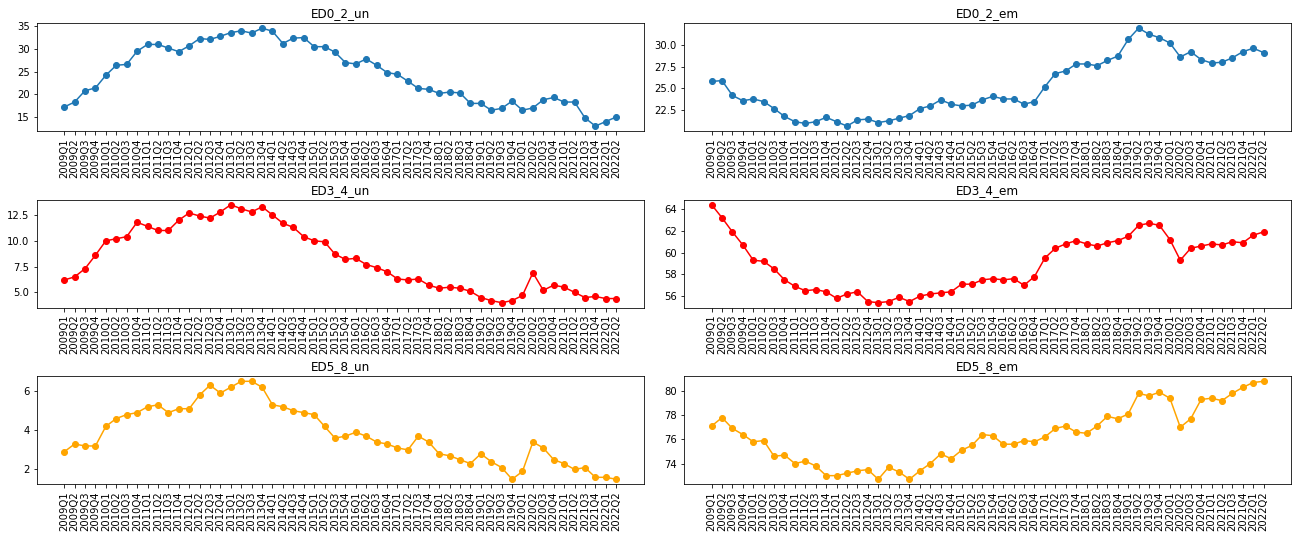

In [291]:
fig = plt.figure(figsize=(18,8))
plt.subplot(321)
plt.plot( 'Year', 'ED0_2_un', data=bg_edu_all, marker='o')
plt.xticks(rotation=90)
plt.title("ED0_2_un")
 
plt.subplot(322)
plt.plot( 'Year','ED0_2_em', data=bg_edu_all, marker='o')
plt.title("ED0_2_em")
plt.xticks(rotation=90)

plt.subplot(323)
plt.plot( 'Year','ED3_4_un', data=bg_edu_all, marker='o', color="red")
plt.title("ED3_4_un")
plt.xticks(rotation=90)

plt.subplot(324)
plt.plot( 'Year','ED3_4_em', data=bg_edu_all, marker='o', color="red")
plt.title("ED3_4_em")
plt.xticks(rotation=90)

plt.subplot(325)
plt.plot( 'Year','ED5_8_un', data=bg_edu_all, marker='o', color="orange")
plt.title("ED5_8_un")
plt.xticks(rotation=90)

plt.subplot(326)
plt.plot( 'Year','ED5_8_em', data=bg_edu_all, marker='o', color="orange")
plt.title("ED5_8_em")
plt.xticks(rotation=90)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
# Show the graph
plt.show()

Examining the dynamics of the employment and unemployment rate by demographic groups in the upper charts, we can pinpoint the following conclusions:

First: since the beginning of the research period, there has been a crisis in the labor market characterized by increasing unemployment rates and decreasing employment rates. The trend continued until 2013, after which the trend changed for both indicators.

Second: it is confirmed that higher levels of education are characterized by higher unemployment rates and lower employment rates.

Third: by gender, higher levels of employment and lower levels of unemployment are observed for men than for women.

Fourth: Despite the impact of the covid-19 crisis, the condition of all demographic structures is improving very quickly to and above pre-crisis levels.





----------------------------------------------------------------------------------------------------------------------------

The graphic matrix used below shows the relationship between different levels of education, unemployment and employment and sex in Bulgaria

In [292]:
bg_edu=merge_all_education[(merge_all_education['country'].isin(["Bulgaria"]))]

fig = px.scatter_matrix(bg_edu,
    dimensions=["ED0_2_un",	"ED3_4_un",	"ED5_8_un"	,"ED0_2_em",	"ED3_4_em"	,"ED5_8_em"],
    color="sex", width=1000, height=800)
fig.show()

The data from the matrix clearly shows not only the inverse relationship between the employment rate and the unemployment rate, but also confirms the second essential element of the present analysis. Specifically, the relationship between gender and the labor market. Men clearly have a higher level of employment compared to women, and such a difference is not as evident in unemployment.

#### Regresion model
В представения регресионен модел се тества връзката между заетостта и безработицата посредством избрано равнище на образование 0-2 и обща стойност за пол. 

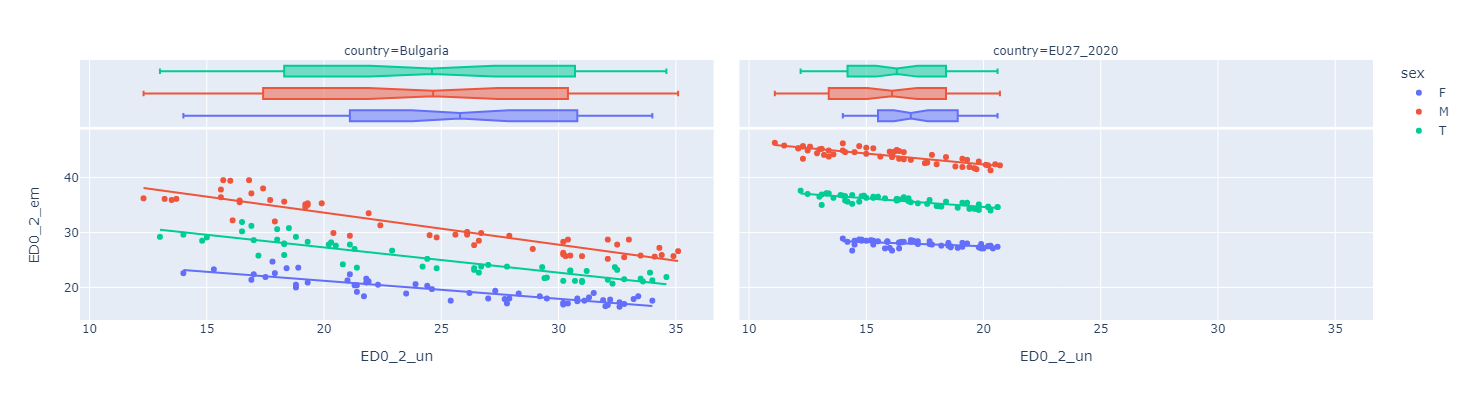

  sex    country                                     px_fit_results
0   F   Bulgaria  <statsmodels.regression.linear_model.Regressio...
1   F  EU27_2020  <statsmodels.regression.linear_model.Regressio...
2   M   Bulgaria  <statsmodels.regression.linear_model.Regressio...
3   M  EU27_2020  <statsmodels.regression.linear_model.Regressio...
4   T   Bulgaria  <statsmodels.regression.linear_model.Regressio...
5   T  EU27_2020  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     238.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.53e-21
Time:                        20:34:55   Log-Likelihood:                -94.095
No. Observations:                  54   AIC:                             192.2
Df Residuals:                      52   BIC:                             196.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4379      0.753     48.365      0.000      34.926      37.950
x1            -0.4582      0.030    -15.444      0.000      -0.518      -0.399
==============================================================================
Omnibus:                        0.050   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.230
Skew:                           0.032   Prob(JB):                        0.891
Kurtosis:                       2.687   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
bg_edu_regression=merge_all_education[(merge_all_education['country'].isin(["EU27_2020" ,"Bulgaria"]))]

fig3 = px.scatter(bg_edu_regression, x="ED0_2_un", y="ED0_2_em", facet_col="country", color="sex", trendline="ols",  width=800, height=400, marginal_x="box")

fig3.show()

results = px.get_trendline_results(fig3)

print(results)

results.query("sex == 'T' and country == 'Bulgaria'").px_fit_results.iloc[0].summary()

The data clearly show that there is a relationship between the employment rate and the unemployment rate. As important data from the regression results, we can point out:
- dependent variable "employment", independent "unemployment"
- coefficient of determination: 0.816 or 81% confirmation of the result
- n value = 0.00, that is, the results are statistically significant
- Durbin-Watson coefficient: indicates absence of autocorrelation
- negative relationship between the variables expressed by the regression coefficients (-0.4589)

## 4. Conclusions

In this research report, the labor market in Bulgaria is analyzed in the context of the EU. After the analysis, the following main conclusions can be drawn:

First: there is no doubt that the unemployment rate and the employment rate are related and have a clear inverse relationship, which has been graphically tested on the one hand and verified by regression analysis on the other.

Second: labor market policies require examining the structure of the labor market by discovering connections and dependencies between demographic structures and labor market dynamics. Such relationships were found in the study of structures by gender and level of education.

Third: the labor market in Bulgaria compared to the EU shows negative values ​​for both indicators compared to most countries for the studied period as an average value, characterized by a greater variation over the years. But in recent years, this trend has changed and Bulgaria has better indicators compared to the EU average.

Fourth: education visibly affects the individual's status on the labor market, as higher levels of education are characterized by greater employment and lower unemployment compared to lower levels.
 
Fifth: there are higher levels of employment among men, but this is to a certain extent explained by the fact that women in a certain period of their lives leave the economically active population.

Sixth: during the studied period, there was a strong impact of the 2008 crisis, which led to a crisis in the labor market until 2013-2014, while the covid-19 crisis had a weak impact both in terms of scale and duration, and they have already reached pre-crisis levels levels on both indicators.

Summary

public labor market policies must effectively impact individuals with a low level of education and the inclusion of women in employment by supporting their exit from the economically inactive population.